#1- Data Prep & EDA: S&P 500 Company Stocks in Consumer Staples, Energy & Financial Sectors
## OPIM 5641: Business Decision Modeling - University of Connecticut - GROUP-4


---

Raw data download and description: Yahoo Finance

**Intro:** In the world of investing, selecting the right stocks is like assembling a winning team. Our goal is to create a smart and reliable portfolio by carefully picking 30 stocks from the S&P 500 companies. We're focusing on companies showing positive trends and less volatility, aiming for a stable and promising investment journey. This strategic approach ensures that our portfolio is well-positioned for success, offering growth potential while minimizing risks. Let's dive into the world of these carefully chosen stocks, shaping a portfolio that aligns with our vision for financial success.




In [ ]:
# This code chunk mounts your Google Drive in Colab thereby connecting your Colab environment to your Google Drive
# so that you can access files and data stored in your Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Necessary Modules

In [ ]:
# Importing essential modules for data manipulation and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Installing and importing packages for fetching stock-specific information.
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 17.1 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=55102d2bd9a5eecf3b19b9da6af49a00913d74298bd4e73ea70c8b95c9784057
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=bf19b033636e83a367f9206a3d6d5a817bec447ce6fbc0d7acd8fc05d3a8f98a
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built bs4 sgmllib3k
  Attempting uninstall: urllib3
    Found exis

In [ ]:
# Setting up plotting to display visualizations in the notebook itself.
%matplotlib inline
from pylab import *
# Importing necessary modules and checking/installing some dependencies.
import shutil
import sys
import os.path
# Installing 'pyomo'
if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))
# Checking for the existence of the 'ipopt' solver
if not shutil.which("ipopt"):
    # Downloading and unzipping the IPOPT solver.
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o -q ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))
# Importing necessary classes and functions from 'pyomo'.
from pyomo.environ import *
# Configuring the solver to be used and setting up the path to the IPOPT executable.
SOLVER = 'ipopt'
EXECUTABLE = '/content/ipopt'
ipopt_executable = '/content/ipopt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.6 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 14.5MB/s]


## 1.1 - Stock Selection and Data extraction

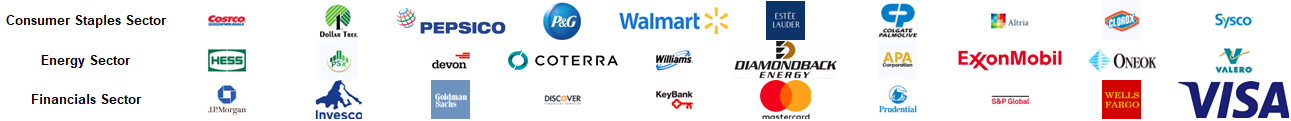

In this piece of code, we're scraping historical stock prices from a selection of 30 stocks, with 10 stocks from each of three sectors: Consumer Staples, Energy, and Financials. The time range for this data spans from January 1, 2017, to December 31, 2021. The outcome is a data frame that sets the stage for our upcoming analysis.








In [ ]:
# Defining lists of ticker symbols for 10 companies each that we chose for different sectors.
# 'con_tickers' for Consumer Staples, 'energy_tickers' for Energy, and 'fin_tickers' for Finance.
con_tickers = ['COST','DLTR','PEP','PG','WMT','EL','CL','MO','CLX','SYY']
energy_tickers = ['HES','PSX','DVN','CTRA','WMB','FANG','APA','XOM','OKE','VLO']
fin_tickers = ['JPM','IVZ','GS','DFS','KEY','MA','PRU','SPGI','WFC','V']
# Fetching historical price data for each stock from date range 01/01/2017 to 12/31/2021
con_dod_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in con_tickers}
energy_dod_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in energy_tickers}
fin_dod_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in fin_tickers}

In [ ]:
# Commenting this block since output is as expected for the next steps
# Uncomment the next line to print Consumer Staples Sector prices
# con_dod_prices
# Uncomment the next line to print Energy Sector prices
# energy_dod_prices
# Uncomment the next line to print Financials Sector prices
# fin_dod_prices

So, when you run the lines above ex: con_dod_prices , you create con_dod_prices, a dictionary.
Each company in Consumer Staples, like Costco ('COST') or Pepsi ('PEP'), gets a detailed stock report.
The data covers opening, high, low, and closing prices, trading volume, and dividends from January 1, 2017,
to December 31, 2021. It's like a quick way to see how each company's stock did over those years.
Just use the ticker symbol to check their specific data.


During the data cleaning phase, we focus on extracting the 'adjclose' prices, as they hold significant importance for our subsequent financial analysis. These adjusted closing prices serve as key indicators for our further steps in the analysis, providing a refined dataset for more accurate insights.

In [ ]:
# Initializing 'prepdata' with sample stock data to avoid potential errors.
# Creating DataFrames for a sample stock in each sector:
# 'COST' for Consumer Staples, 'HES' for Energy, and 'JPM' for Finance.

con_data = pd.DataFrame(con_dod_prices['COST']['adjclose']).rename(columns = {"adjclose":"COST"})
energy_data = pd.DataFrame(energy_dod_prices['HES']['adjclose']).rename(columns = {"adjclose":"HES"})
fin_data = pd.DataFrame(fin_dod_prices['JPM']['adjclose']).rename(columns = {"adjclose":"JPM"})

# Extracting the 'adjclose' data for all tickers in each sector and adding it to the respective DataFrames.
# Looping through Consumer Staples tickers.
for i in con_tickers[1:]:
    con_data[i] = pd.DataFrame(con_dod_prices[i]['adjclose'])

# Looping through Energy tickers.
for i in energy_tickers[1:]:
    energy_data[i] = pd.DataFrame(energy_dod_prices[i]['adjclose'])

# Looping through Finance tickers.
for i in fin_tickers[1:]:
    fin_data[i] = pd.DataFrame(fin_dod_prices[i]['adjclose'])


In [ ]:
# When uncommented, the lines below will display the DataFrame containing the adjusted close prices.
# con_data
# energy_data
# fin_data

In [ ]:
# Checking for null values
for key, value in con_data.items():
    if value is None:
        print(key, 'has a null value')

    else:
        print(key, 'has no null values')

COST has no null values
DLTR has no null values
PEP has no null values
PG has no null values
WMT has no null values
EL has no null values
CL has no null values
MO has no null values
CLX has no null values
SYY has no null values


In [ ]:
# Checking for null values
for key, value in energy_data.items():
    if value is None:
        print(key, 'has a null value')

    else:
        print(key, 'has no null values')

HES has no null values
PSX has no null values
DVN has no null values
CTRA has no null values
WMB has no null values
FANG has no null values
APA has no null values
XOM has no null values
OKE has no null values
VLO has no null values


In [ ]:
# Checking for null values
for key, value in fin_data.items():
    if value is None:
        print(key, 'has a null value')

    else:
        print(key, 'has no null values')

JPM has no null values
IVZ has no null values
GS has no null values
DFS has no null values
KEY has no null values
MA has no null values
PRU has no null values
SPGI has no null values
WFC has no null values
V has no null values


Since there are no null values we are not dropping anything.

In [ ]:
# data shape
print(con_data.shape, energy_data.shape, fin_data.shape)

(1258, 10) (1258, 10) (1258, 10)


## 1.2 - Visualizations

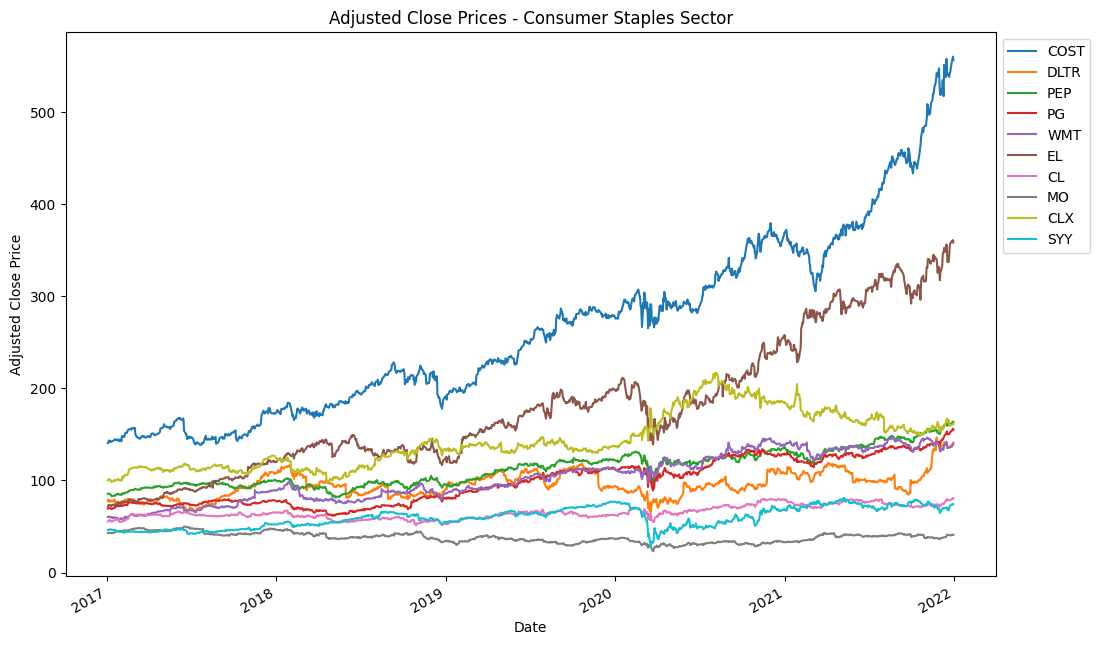

In [ ]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Plotting a line graph for each ticker in 'con_data'
con_data.plot(figsize=(12, 8), title='Adjusted Close Prices - Consumer Staples Sector')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 1.3.1 - What I see in visualization plot for Consumer staples sector

Looking at the time-series graph for the Consumer Staples sector, PEP (PepsiCo) emerges as a compelling choice among other stocks ('COST', 'DLTR', 'PG', 'WMT', 'EL', 'CL', 'MO', 'CLX', 'SYY'). PEP exhibits a steady and consistently positive trend throughout the 2017 to 2022 period. This stable performance suggests resilience and reliability, making PEP an attractive option for investors seeking a less volatile and more predictable investment in the Consumer Staples sector.

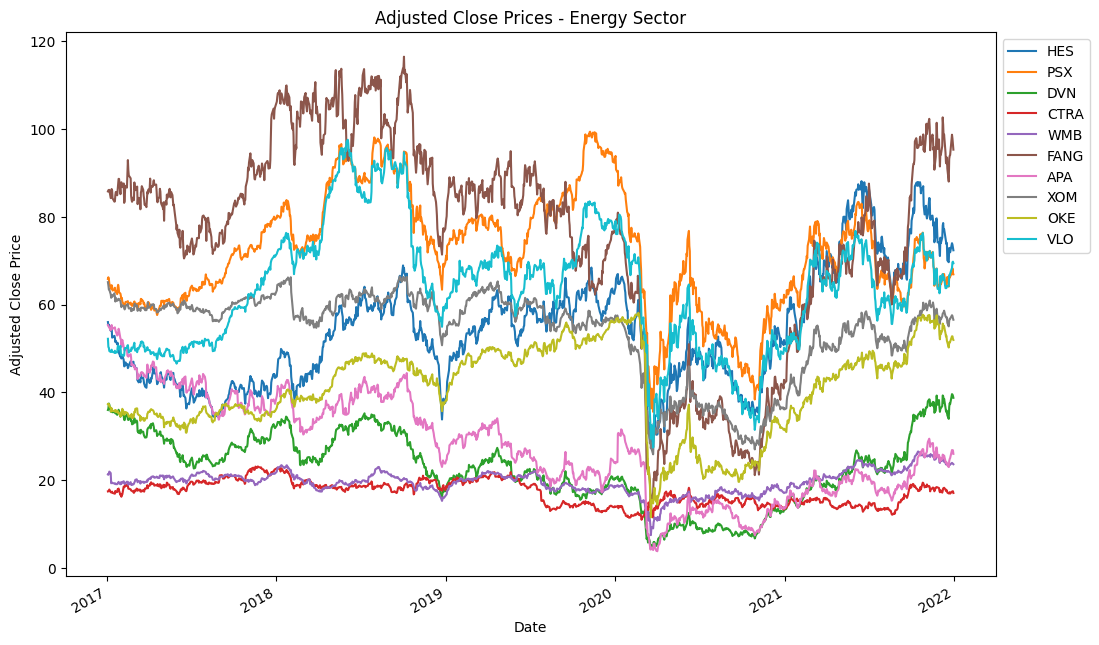

In [ ]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Plotting a line graph for each ticker in 'con_data'
energy_data.plot(figsize=(12, 8), title='Adjusted Close Prices - Energy Sector')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 1.3.2 - What I see in visualization plot for Energy sector


Amongst the stocks in the Energy sector from 2017 to 2022, 'XOM' stands out as a compelling choice. ExxonMobil ('XOM') exhibits a steadiness reminiscent of 'WMB', displaying consistent returns with relatively lower volatility. This stability, coupled with a resilient performance even during market downturns, positions 'XOM' as an ideal choice for investors seeking a balanced and reliable investment in the energy market. Its ability to weather uncertainties sets it apart from the more volatile options, making 'XOM' a prudent selection for a resilient investment strategy.

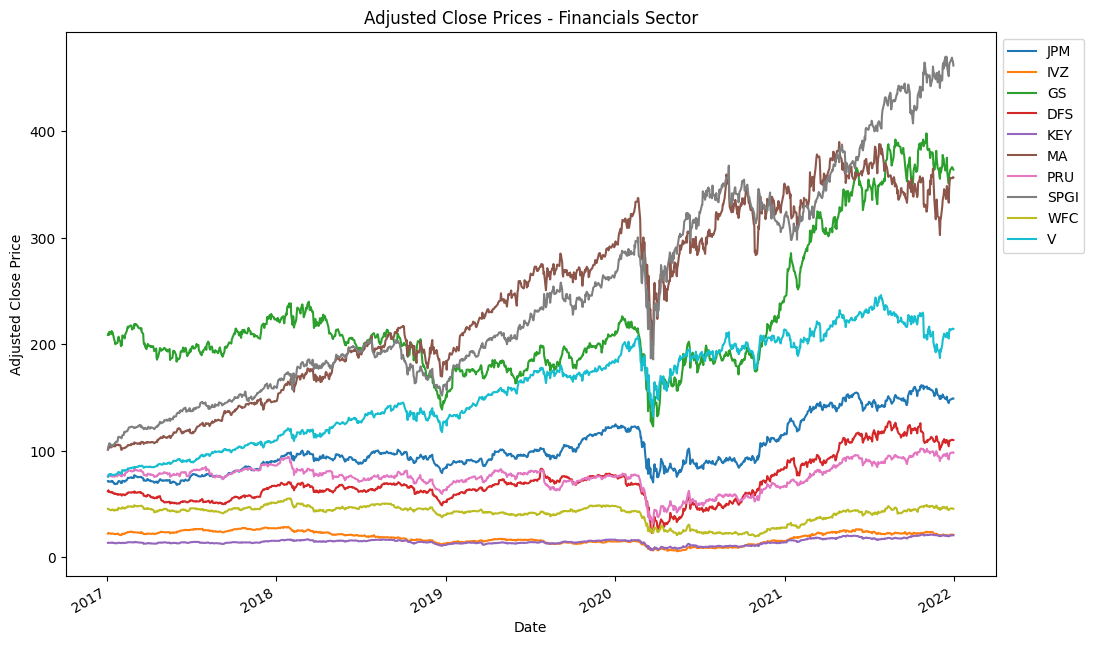

In [ ]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Plotting a line graph for each ticker in 'con_data'
fin_data.plot(figsize=(12, 8), title='Adjusted Close Prices - Financials Sector')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

##1.3.3 - What I see in visualization plot for Financials sector


JPMorgan Chase & Co. (JPM) emerges as a compelling choice within the financials sector, showcasing intriguing volatility dynamics from 2017 to 2021. The stock experiences relatively low volatility in the initial years, with a notable spike during specific periods, providing a nuanced view of its market behavior. JPM's overall trend and volatility patterns contribute to its significance in the financial sector, offering us valuable information for strategic decision-making.

## 1.4 - Calculation of differences from previous days

In [ ]:
# creating return features for each ticker in Consumer Staples Sector
# we will use a pct_change - shows the fractional change in values over a series of time. Unline the name for % change we have to multiply by 100
return_con_data = pd.DataFrame()
for i in con_tickers:
  return_con_data[i] = con_data[i].pct_change()
# drop the na records
return_con_data.dropna(inplace=True)
return_con_data

,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2017-01-04,0.000188,0.025823,0.001911,0.003564,0.005826,0.017716,0.010986,0.003253,0.007519,0.009146
2017-01-05,0.019717,-0.017495,-0.001335,0.006627,0.002172,-0.001271,0.008904,0.001179,0.006315,-0.003263
2017-01-06,-0.000491,-0.012426,-0.001433,-0.000352,-0.013726,0.007125,0.007629,0.004416,-0.001467,0.007092
2017-01-09,-0.011423,0.000649,-0.010520,-0.007409,0.006593,-0.011622,-0.013955,-0.004104,-0.009958,0.005417
2017-01-10,0.004287,0.010630,-0.014402,-0.010782,-0.006986,-0.011375,-0.015507,-0.003385,-0.015828,-0.006286
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.001274,0.003516,-0.001118,0.004896,-0.002217,0.011861,0.004002,-0.003840,-0.005504,0.018334
2021-12-27,0.023802,0.010730,0.009954,0.011680,0.009104,0.008962,0.013528,0.001927,0.006242,0.011220
2021-12-28,0.002076,0.005922,0.005190,0.005371,0.014351,-0.003981,0.006554,0.012610,0.006086,0.010450
2021-12-29,0.005543,0.007251,0.003539,0.008290,-0.000490,0.006199,0.005328,0.000422,-0.003199,-0.004852


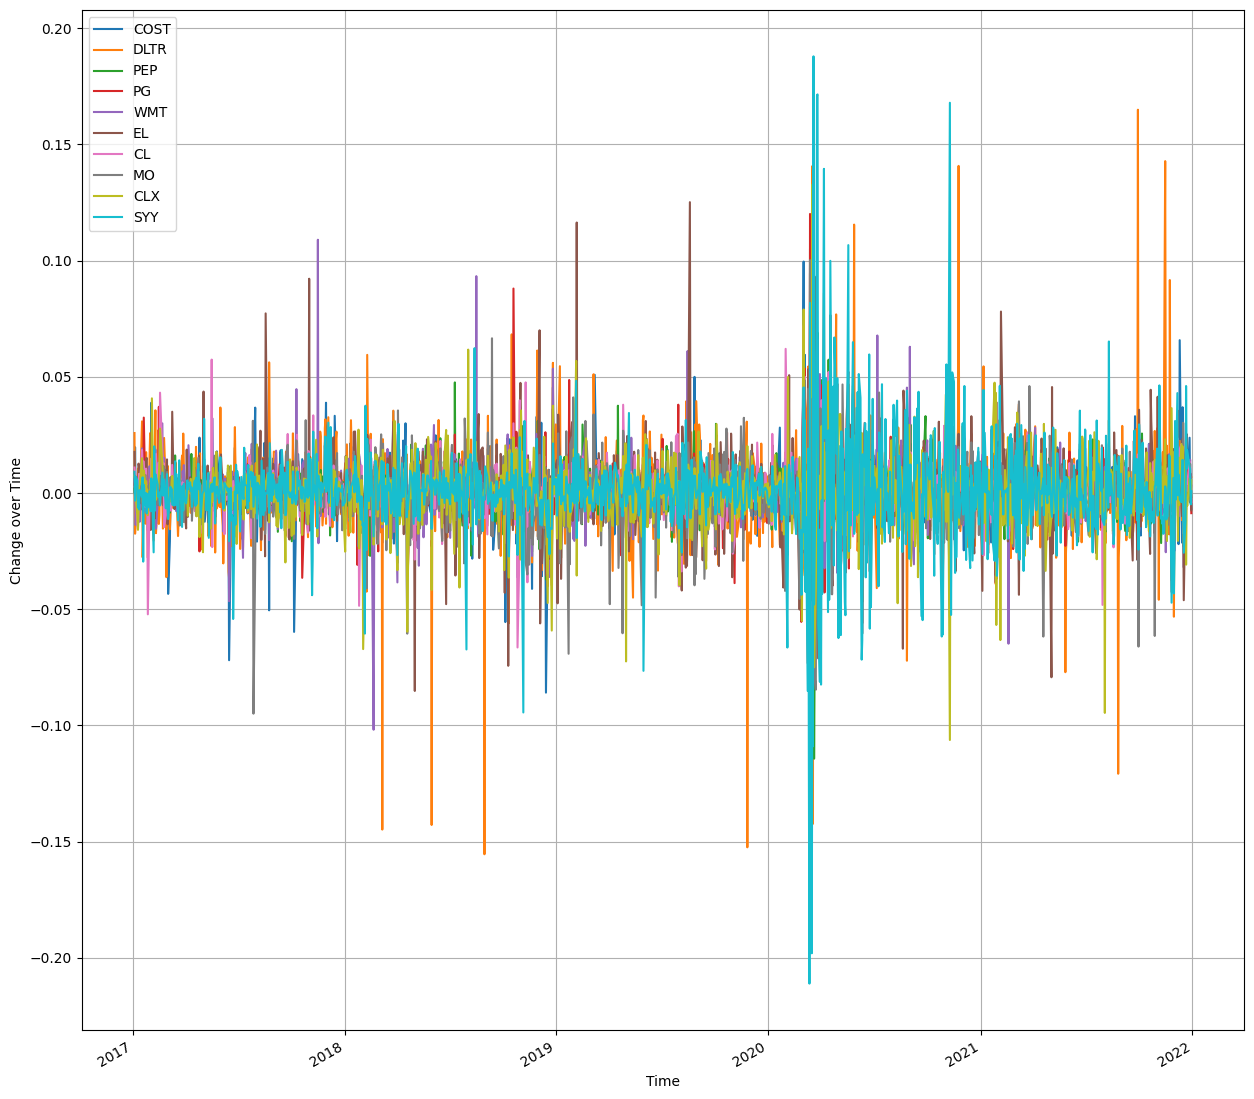

In [ ]:
return_con_data.plot(
        grid=True,
        layout=(3,3),
         figsize=(15,15),xlabel='Time',ylabel='Change over Time')
plt.show()

In [ ]:
# creating return features for each ticker in Energy Sector
return_energy_data = pd.DataFrame()
for i in energy_tickers:
  return_energy_data[i] = energy_data[i].pct_change()
# drop the na records
return_energy_data.dropna(inplace=True)
return_energy_data

,HES,PSX,DVN,CTRA,WMB,FANG,APA,XOM,OKE,VLO
2017-01-04,-0.014168,0.005415,0.008921,0.001343,-0.003179,0.003099,-0.002979,-0.011002,-0.002553,-0.035927
2017-01-05,0.002745,-0.005959,0.031789,0.012070,0.012118,0.000965,-0.005346,-0.014907,0.003925,-0.003093
2017-01-06,-0.003221,-0.015448,-0.006937,0.011042,0.021424,-0.000096,-0.002055,-0.000564,-0.015808,-0.015071
2017-01-09,-0.020840,-0.016159,-0.042942,-0.034949,-0.015114,-0.021513,-0.012041,-0.016497,-0.007254,-0.004351
2017-01-10,0.013859,-0.003094,0.002576,0.003621,-0.107422,0.012620,0.008178,-0.012753,-0.024530,0.002411
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.008366,0.003910,-0.005675,-0.018228,0.006620,0.002365,0.009291,0.000492,0.004154,0.006031
2021-12-27,0.028848,0.012378,0.060880,0.026818,0.015861,0.049084,0.072881,0.014258,0.023957,0.019518
2021-12-28,-0.004365,0.015661,-0.002466,0.002511,-0.003808,-0.008818,-0.001430,-0.003232,-0.000168,0.018734
2021-12-29,-0.008103,-0.014608,-0.006742,0.002505,-0.004587,-0.013163,-0.000716,-0.008753,-0.010606,0.002014


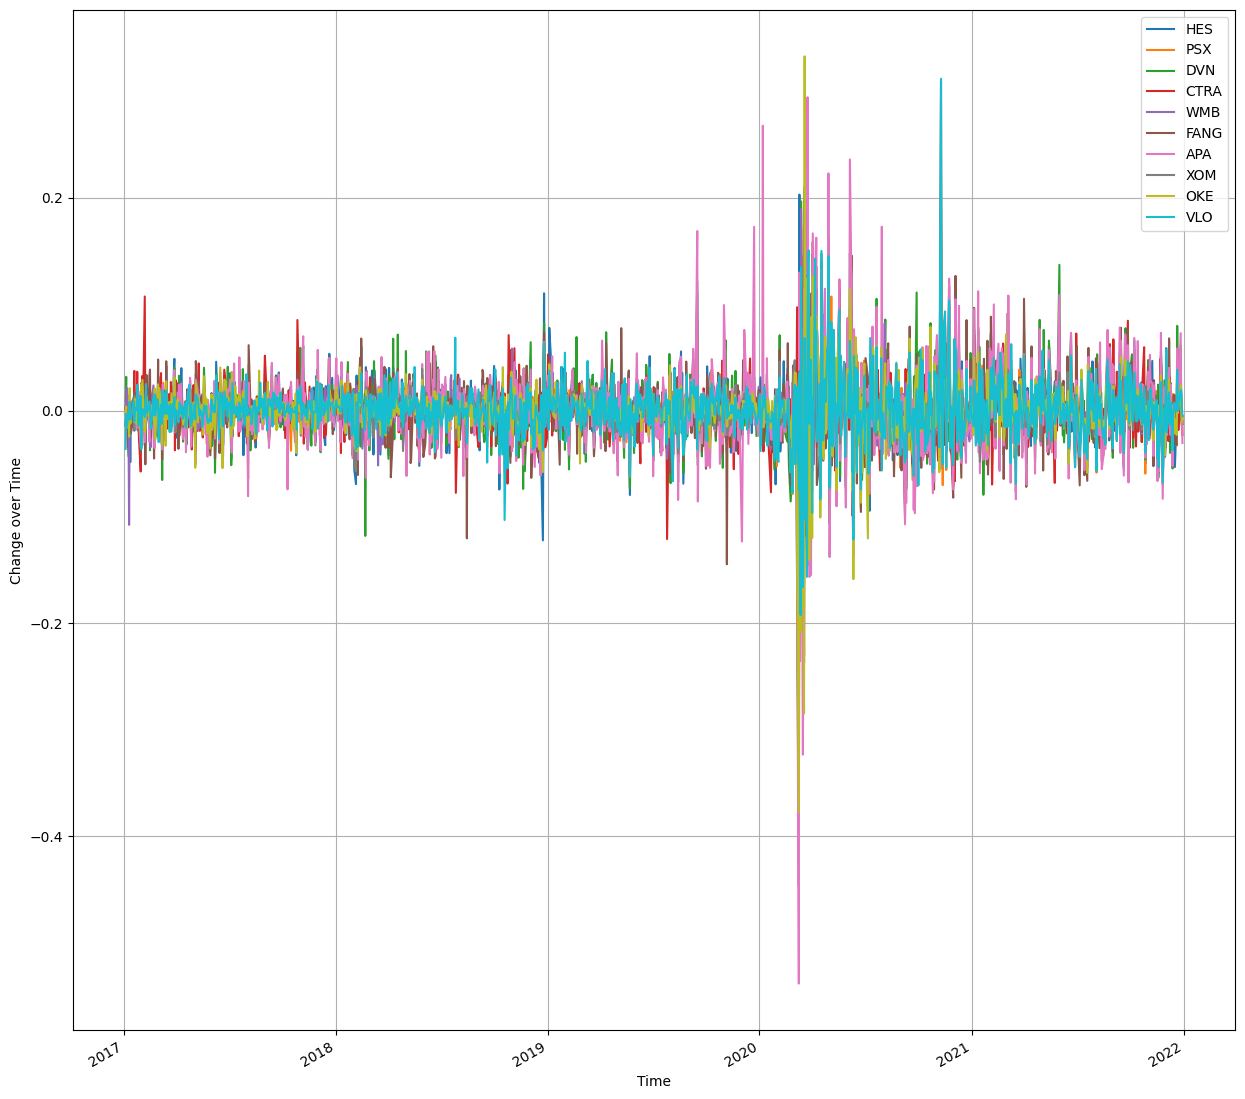

In [ ]:
return_energy_data.plot(
        grid=True,
        layout=(3,3),
         figsize=(15,15),xlabel='Time',ylabel='Change over Time')
plt.show()

In [ ]:
# creating return features for each ticker in Financials Sector
return_fin_data = pd.DataFrame()
for i in fin_tickers:
  return_fin_data[i] = fin_data[i].pct_change()
# drop the na records
return_fin_data.dropna(inplace=True)
return_fin_data

,JPM,IVZ,GS,DFS,KEY,MA,PRU,SPGI,WFC,V
2017-01-04,0.001844,0.027158,0.006458,0.016637,0.013691,0.009489,0.012207,0.030907,0.000893,0.008176
2017-01-05,-0.009205,-0.007869,-0.007445,-0.014066,-0.012425,0.007723,-0.014980,0.007607,-0.015522,0.011728
2017-01-06,0.000116,0.000317,0.014835,-0.011523,0.002188,0.007197,0.005739,0.017852,-0.002537,0.013812
2017-01-09,0.000697,-0.021567,-0.008207,-0.006106,-0.003275,-0.001949,-0.003899,-0.011518,-0.014535,-0.005596
2017-01-10,0.002901,-0.005835,-0.001317,0.006842,0.012048,-0.002138,0.007924,-0.017038,0.007006,-0.005382
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.003574,0.023684,0.007088,0.004179,0.003530,0.008672,0.012534,0.001014,0.006871,-0.006148
2021-12-27,0.005723,0.008997,0.007791,0.006763,0.015391,-0.000749,0.005358,0.009203,0.008478,0.004663
2021-12-28,0.003035,-0.000849,-0.001108,-0.000431,0.004331,0.001304,0.002114,-0.006275,-0.007177,0.001930
2021-12-29,-0.000504,-0.007225,-0.003638,-0.002585,0.004743,0.001414,0.000183,-0.001158,0.000620,0.000550


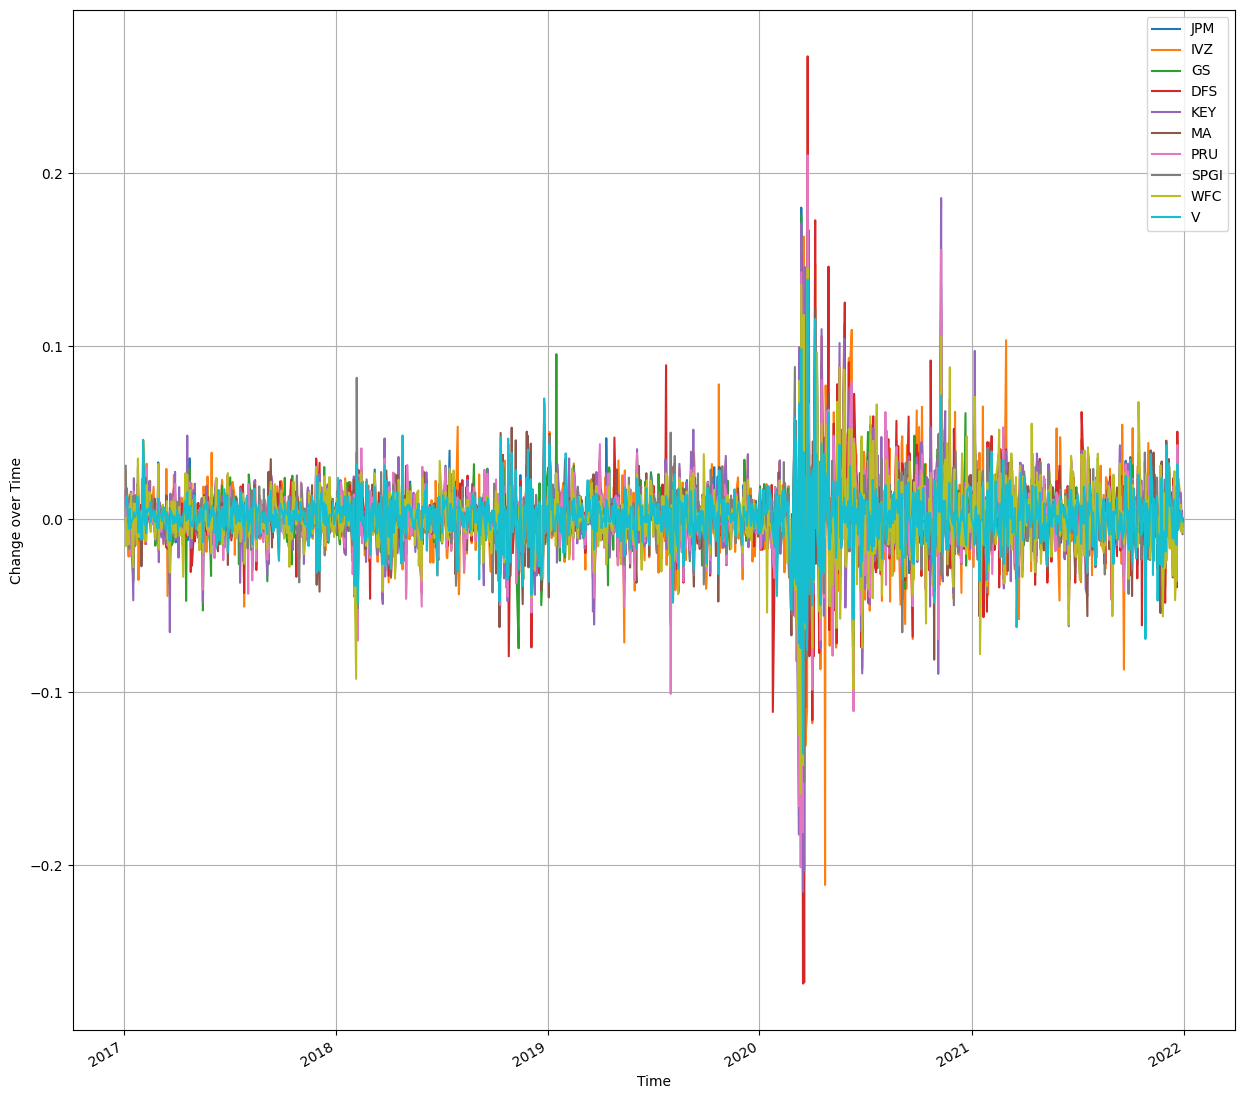

In [ ]:
return_fin_data.plot(
        grid=True,
        layout=(3,3),
         figsize=(15,15),xlabel='Time',ylabel='Change over Time')
plt.show()

In [ ]:
# data check
print(return_con_data.shape, return_energy_data.shape, return_fin_data.shape)

(1257, 10) (1257, 10) (1257, 10)


# 2 - Momentum Trading for Stock Selection: S&P 500 Company Stocks in Consumer Staples, Energy & Financial Sectors

In this section, our goal is to calculate returns based on buy and sell conditions related to moving averages.

## 2.1 - Data Prep to Prepare for Momentum Trading

In this section we are preping as well as adding columns to support Momemtum Trading. A key part of the momentum trading strategy relies on the 8 and 21 day moving averages. If we were to take the data starting at the first of the year, our moving averages wouldnt be true 8 and 21 day moving averages. To adjust for this, we are taking data all the way back from December of 2020 to ensure we have 8 and 21 day moving averages come the first of the year.

In [ ]:
# Convert the index to datetime format
con_data.index = pd.to_datetime(con_data.index)
energy_data.index = pd.to_datetime(energy_data.index)
fin_data.index = pd.to_datetime(fin_data.index)

# Extract data for the year 2021 (starting in late 2020 for reasons listed above)
con_data_2021 = con_data.loc['2020-12-02':'2021-12-31']
energy_data_2021 = energy_data.loc['2020-12-02':'2021-12-31']
fin_data_2021 = fin_data.loc['2020-12-02':'2021-12-31']

# Display the DataFrame for the year 2021
#print(con_data_2021)

#for visualization and confirmation
# con_data_2021.head(10)
# energy_data_2021.head(10)
fin_data_2021.head(10)

,JPM,IVZ,GS,DFS,KEY,MA,PRU,SPGI,WFC,V
2020-12-02,112.067200,14.941596,220.556427,76.476952,13.843637,334.546021,67.960793,324.584656,26.983887,205.695038
2020-12-03,111.332573,15.868760,218.533264,75.681175,13.852316,329.550659,68.124916,318.088654,27.254944,203.610489
2020-12-04,112.342682,15.859846,222.347610,77.422501,13.991185,338.607086,70.215225,330.593719,27.619463,208.141693
2020-12-07,111.920280,16.064894,221.298920,77.188461,13.774201,335.273621,69.083687,327.467407,27.423185,208.112350
2020-12-08,112.030464,16.109468,221.660858,76.720360,13.852316,335.106506,69.316910,324.993713,27.049316,208.229767
2020-12-09,111.158112,15.779611,225.354568,77.881226,13.930429,331.232178,69.299629,318.741211,27.152128,205.107834
2020-12-10,110.441841,15.610226,226.820908,78.789322,13.956470,325.991089,69.066422,317.329010,27.563385,203.179855
2020-12-11,109.789879,15.922251,222.728134,78.133995,13.748164,321.959442,67.874413,316.345398,27.180168,201.839111
2020-12-14,108.632835,15.244708,220.686386,77.356956,13.392308,325.627228,66.172798,315.235107,26.768915,202.827560
2020-12-15,110.487762,15.681547,224.992615,79.912750,13.617972,328.085541,67.209335,315.390961,27.787708,203.913879


In [ ]:
Day_con = np.arange(1, len(con_data_2021) + 1) #generate list of trading days for consumer
Day_energy = np.arange(1, len(energy_data_2021) + 1) #generate list of trading days for energy
Day_fin = np.arange(1, len(con_data_2021) + 1) #generate list of trading days for fin

#here we are adding a Day Column that will be helpful in determine moving averages
con_data_2021.insert(0, 'Day', Day_con)
energy_data_2021.insert(0, 'Day', Day_energy)
fin_data_2021.insert(0, 'Day', Day_fin)
#displaying just consumer staple to ensure accuracy
con_data_2021.head()

,Day,COST,DLTR,PEP,PG,WMT,EL,CL,MO,CLX,SYY
2020-12-02,1,375.224915,111.629997,132.093033,128.435425,143.687714,237.518768,79.781479,31.643219,184.703476,67.526123
2020-12-03,2,365.978790,112.120003,132.877701,127.488579,142.523102,237.654297,79.269714,31.959484,184.263947,69.317543
2020-12-04,3,365.372192,112.510002,134.165543,127.609268,142.150818,236.356918,79.120819,32.710636,183.119324,72.510544
2020-12-07,4,365.274323,111.949997,133.724030,127.804214,141.387115,237.944778,79.455811,32.963661,183.696213,70.422096
2020-12-08,5,369.452209,109.459999,133.861984,128.147644,142.666275,240.578278,79.251091,33.390633,185.774841,71.211075


Here we are checking for any null values that could cause issues when calculating averages.

In [ ]:
con_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2020-12-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     272 non-null    int64  
 1   COST    272 non-null    float64
 2   DLTR    272 non-null    float64
 3   PEP     272 non-null    float64
 4   PG      272 non-null    float64
 5   WMT     272 non-null    float64
 6   EL      272 non-null    float64
 7   CL      272 non-null    float64
 8   MO      272 non-null    float64
 9   CLX     272 non-null    float64
 10  SYY     272 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 25.5 KB


##2.2 - Moving Averages

Here we are calculating the moving averages for each stock in each sector, a key piece in Momentum Trading. For this, we will consider 8 and 21 day moving averages.

In [ ]:
columns_to_process_con = con_data_2021.columns[1:]  # Exclude the 'Day' and index columns
columns_to_process_energy = energy_data_2021.columns[1:]  # Exclude the 'Day' and index columns
columns_to_process_fin = fin_data_2021.columns[1:]  # Exclude the 'Day' and index columns

# Creating a new DataFrame to store moving averages
moving_averages_con = pd.DataFrame()
moving_averages_energy = pd.DataFrame()
moving_averages_fin = pd.DataFrame()

# Loop through each column (excluding the first two columns) and calculate moving averages
for column in columns_to_process_con:
    # Calculate 8-day and 21-day moving averages
    moving_averages_con.loc[:, '{}-day-8'.format(column)] = con_data_2021[column].rolling(8).mean().shift()
    moving_averages_con.loc[:, '{}-day-21'.format(column)] = con_data_2021[column].rolling(21).mean().shift()

for column in columns_to_process_energy:
    # Calculate 8-day and 21-day moving averages
    moving_averages_energy.loc[:, '{}-day-8'.format(column)] = energy_data_2021[column].rolling(8).mean().shift()
    moving_averages_energy.loc[:, '{}-day-21'.format(column)] = energy_data_2021[column].rolling(21).mean().shift()

for column in columns_to_process_fin:
    # Calculate 8-day and 21-day moving averages
    moving_averages_fin.loc[:, '{}-day-8'.format(column)] = fin_data_2021[column].rolling(8).mean().shift()
    moving_averages_fin.loc[:, '{}-day-21'.format(column)] = fin_data_2021[column].rolling(21).mean().shift()

# Drop rows with NaN values
moving_averages_con.dropna(inplace=True)
moving_averages_energy.dropna(inplace=True)
moving_averages_fin.dropna(inplace=True)

#Displaying for validation
moving_averages_con.head()

,COST-day-8,COST-day-21,DLTR-day-8,DLTR-day-21,PEP-day-8,PEP-day-21,PG-day-8,PG-day-21,WMT-day-8,WMT-day-21,EL-day-8,EL-day-21,CL-day-8,CL-day-21,MO-day-8,MO-day-21,CLX-day-8,CLX-day-21,SYY-day-8,SYY-day-21
2021-01-04,360.607269,363.673001,108.752501,109.947143,134.398987,133.842590,127.885427,127.594235,138.294312,140.009732,252.692869,246.092396,79.076630,79.135894,33.430199,33.429424,185.076620,184.906233,67.745420,68.947156
2021-01-05,362.463825,363.516918,108.180001,109.723810,134.269056,133.872071,127.920237,127.570366,138.361380,139.852706,252.749750,246.538228,78.962642,79.073417,33.305275,33.491777,184.846554,184.850855,67.726854,68.927708
2021-01-06,364.140594,363.595657,107.948750,109.486191,134.347244,133.883022,128.169713,127.630484,138.547016,139.715551,252.915554,247.154649,78.976601,79.043730,33.210828,33.535996,184.688597,184.797657,67.825473,68.843286
2021-01-07,365.134911,363.436779,108.617500,109.508096,134.177061,133.755115,128.612960,127.749390,138.959000,139.637642,252.759430,247.810258,78.723040,78.920550,33.151321,33.569804,184.125444,184.685594,68.188626,68.749582
2021-01-08,365.543407,363.184723,109.332500,109.641429,133.879246,133.628082,128.744076,127.801107,139.336246,139.595641,252.435083,248.387025,78.346187,78.761479,33.157372,33.605396,183.281866,184.503330,68.608664,68.757106


Notice here the first day of the 8 and 21 day moving averages is January 4th. This is the first trading day of 2021 so this is as expected. If we did not start in December of 2020, our 8 and 21 day averages values would have started in the first week of Janaury.

## 2.3 - Returns

Here we are calculating returns for each stock in each sector which with we will eventually have to manipulate to calculate the system return which will show us the top performing stocks in each sector.

In [ ]:
# Iterate over each stock and calculate the corresponding 'returns' column
stock_names_con = con_data_2021.columns[1:]  # Exclude the 'Day' column
stock_names_energy = energy_data_2021.columns[1:]
stock_names_fin = fin_data_2021.columns[1:]

for stock_name in stock_names_con:
  returns_col_con = f"{stock_name}-return"
  # Calculate log returns
  con_data_2021[returns_col_con] = np.log(con_data_2021[stock_name]).diff()
  # Store the returns column in moving_averages_df
  moving_averages_con[returns_col_con] = con_data_2021[returns_col_con]
for stock_name in stock_names_energy:
  returns_col_energy = f"{stock_name}-return"
  # Calculate log returns
  energy_data_2021[returns_col_energy] = np.log(energy_data_2021[stock_name]).diff()
  # Store the returns column in moving_averages_df
  moving_averages_energy[returns_col_energy] = energy_data_2021[returns_col_energy]
for stock_name in stock_names_fin:
  returns_col_fin = f"{stock_name}-return"
  # Calculate log returns
  fin_data_2021[returns_col_fin] = np.log(fin_data_2021[stock_name]).diff()
  # Store the returns column in moving_averages_df
  moving_averages_fin[returns_col_fin] = fin_data_2021[returns_col_fin]

<ipython-input-27-f656fb5bef33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_2021[returns_col_con] = np.log(con_data_2021[stock_name]).diff()
<ipython-input-27-f656fb5bef33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_data_2021[returns_col_con] = np.log(con_data_2021[stock_name]).diff()
<ipython-input-27-f656fb5bef33>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

## 2.4 - Invested Column

Here we are adding an invested column to show whether we are currently in the market with that particular stock or if we are out of the market. A value of 1 denoties that the 8- day average is greater than the 21 day moving average and we are therefore invested. 0 means we are not currently invested.

In [ ]:
#List of stock names by extracting the prefix before '-day-'
stock_names_con = set(col.split('-')[0] for col in moving_averages_con.columns)
stock_names_energy = set(col.split('-')[0] for col in moving_averages_energy.columns)
stock_names_fin = set(col.split('-')[0] for col in moving_averages_fin.columns)

# Iterate over each stock and create the corresponding 'invested' column for Consumer Staples Sector
for stock_name in stock_names_con:
    day_8_col = f"{stock_name}-day-8"
    day_21_col = f"{stock_name}-day-21"
    invested_col = f"{stock_name}-invested"
    moving_averages_con[invested_col] = np.where(moving_averages_con[day_8_col] > moving_averages_con[day_21_col], 1, 0)

# Iterate over each stock and create the corresponding 'invested' column for Energy Sector
for stock_name in stock_names_energy:
    day_8_col = f"{stock_name}-day-8"
    day_21_col = f"{stock_name}-day-21"
    invested_col = f"{stock_name}-invested"
    moving_averages_energy[invested_col] = np.where(moving_averages_energy[day_8_col] > moving_averages_energy[day_21_col], 1, 0)

# Iterate over each stock and create the corresponding 'invested' column for Financials Sector
for stock_name in stock_names_fin:
    day_8_col = f"{stock_name}-day-8"
    day_21_col = f"{stock_name}-day-21"
    invested_col = f"{stock_name}-invested"
    moving_averages_fin[invested_col] = np.where(moving_averages_fin[day_8_col] > moving_averages_fin[day_21_col], 1, 0)

## 2.5 - Signal Column
Now we make a column called 'signal' which tells us when to enter and leave the market based on the momentum trading strategy. We want to buy when the trend is changing and flips.

A value of +1 indicates that we should buy, and a value of -1 indicates that we should sell.

In [ ]:
#Signal column indicator

for stock_name in stock_names_con:
    invested_col = f"{stock_name}-invested"
    signal = f"{stock_name}-signal"

    moving_averages_con[signal] = moving_averages_con[invested_col].diff()
    moving_averages_con.at[moving_averages_con.index[0], signal] = 1.0  # Set NaN in the first row to 1.0

# Display the modified DataFrame with the 'signal' columns

for stock_name in stock_names_energy:
    invested_col = f"{stock_name}-invested"
    signal = f"{stock_name}-signal"

    moving_averages_energy[signal] = moving_averages_energy[invested_col].diff()
    moving_averages_energy.at[moving_averages_energy.index[0], signal] = 1.0  # Set NaN in the first row to 1.0

# Display the modified DataFrame with the 'signal' columns

for stock_name in stock_names_fin:
    invested_col = f"{stock_name}-invested"
    signal = f"{stock_name}-signal"

    moving_averages_fin[signal] = moving_averages_fin[invested_col].diff()
    moving_averages_fin.at[moving_averages_con.index[0], signal] = 1.0  # Set NaN in the first row to 1.0

# Display the modified DataFrames with the 'signal' columns (only needed for validation)
#print(moving_averages_con.head(10))
# print(moving_averages_energy.head(10))
# print(moving_averages_fin.head(10))


## 2.6 - System Returns

In this section we get the true returns of each stock using momentum trading strategy. This combines the returns with the invested column to allow us to determine overall returns and compare with others.

In [ ]:
##System Returns with Momentum Trading

# Iterate over each stock and calculate the corresponding 'system_return' column
stock_names_con = set(col.split('-')[0] for col in moving_averages_con.columns)
for stock_name in stock_names_con:
    return_col = f"{stock_name}-return"
    invested_col = f"{stock_name}-invested"
    system_return_col = f"{stock_name}-system_return"

    # Calculate the 'system_return' column
    moving_averages_con[system_return_col] = moving_averages_con[invested_col] * moving_averages_con[return_col]

for stock_name in stock_names_energy:
    return_col = f"{stock_name}-return"
    invested_col = f"{stock_name}-invested"
    system_return_col = f"{stock_name}-system_return"

    # Calculate the 'system_return' column
    moving_averages_energy[system_return_col] = moving_averages_energy[invested_col] * moving_averages_energy[return_col]

for stock_name in stock_names_fin:
    return_col = f"{stock_name}-return"
    invested_col = f"{stock_name}-invested"
    system_return_col = f"{stock_name}-system_return"

    # Calculate the 'system_return' column
    moving_averages_fin[system_return_col] = moving_averages_fin[invested_col] * moving_averages_fin[return_col]


 #Display the modified moving_averages DataFrame with the 'system_return' columns
print("Consumer Staples:")
print(moving_averages_con.filter(regex='-system_return'))

# Display the data frame for Energy
print("\nEnergy:")
print(moving_averages_energy.filter(regex='-system_return'))

# Display the data frame for Financials
print("\nFinancials:")
print(moving_averages_fin.filter(regex='-system_return'))


Consumer Staples:
            SYY-system_return  CL-system_return  COST-system_return  \
2021-01-04          -0.000000         -0.000000            0.000000   
2021-01-05           0.000000          0.000000           -0.000000   
2021-01-06           0.000000         -0.000000           -0.015340   
2021-01-07           0.000000         -0.000000           -0.005691   
2021-01-08           0.000000          0.000000            0.005475   
...                       ...               ...                 ...   
2021-12-23           0.018168          0.003994            0.001273   
2021-12-27           0.011157          0.013438            0.023523   
2021-12-28           0.010396          0.006533            0.002074   
2021-12-29          -0.004864          0.005314            0.005528   
2021-12-30           0.000770         -0.003776           -0.006822   

            PEP-system_return  EL-system_return  MO-system_return  \
2021-01-04          -0.027551         -0.042986         -0.0

## 2.7 - Performance of Momentum Trading For Each Stock

In this section we are consolidating all of the returns for each stock and organizing each sector from greatest returns to least. This will help in determining which stocks to carry onto other sections. As an example, if we invested 1 dollar, a 1.5 return means we earned out dollar back as well as 50 cents on top of our initial dollar.

In [ ]:
total_returns_con = {}
total_returns_energy = {}
total_returns_fin = {}

for stock_name in stock_names_con:
    system_return_col = f"{stock_name}-system_return"

    # Calculate the total return for each stock for Consumer Staple
    total_return = np.exp(np.sum(moving_averages_con[system_return_col]))
    total_returns_con[stock_name] = total_return

# Display the total returns for each stock in descending order
sorted_total_returns_con = sorted(total_returns_con.items(), key=lambda x: x[1], reverse=True)
print("CONSUMER STAPLES SECTOR")
for stock_name, total_return in sorted_total_returns_con:
    print(f"Stock: {stock_name}, Total Return: {total_return:.4f}")

print('--------------------')
print("ENERGY SECTOR")
for stock_name in stock_names_energy:
    system_return_col = f"{stock_name}-system_return"

    # Calculate the total return for each stock for Energy
    total_return = np.exp(np.sum(moving_averages_energy[system_return_col]))
    total_returns_energy[stock_name] = total_return

# Display the total returns for each stock in descending order
sorted_total_returns_energy = sorted(total_returns_energy.items(), key=lambda x: x[1], reverse=True)
for stock_name, total_return in sorted_total_returns_energy:
    print(f"Stock: {stock_name}, Total Return: {total_return:.4f}")

print('--------------------')
print("FINANCIAL SECTOR")

for stock_name in stock_names_fin:
    system_return_col = f"{stock_name}-system_return"

    # Calculate the total return for each stock for Financial
    total_return = np.exp(np.sum(moving_averages_fin[system_return_col]))
    total_returns_fin[stock_name] = total_return

# Display the total returns for each stock in descending order
sorted_total_returns_fin = sorted(total_returns_fin.items(), key=lambda x: x[1], reverse=True)
for stock_name, total_return in sorted_total_returns_fin:
    print(f"Stock: {stock_name}, Total Return: {total_return:.4f}")



CONSUMER STAPLES SECTOR
Stock: COST, Total Return: 1.5553
Stock: PEP, Total Return: 1.1412
Stock: PG, Total Return: 1.1350
Stock: DLTR, Total Return: 1.1158
Stock: CL, Total Return: 1.1003
Stock: MO, Total Return: 1.0826
Stock: WMT, Total Return: 1.0371
Stock: SYY, Total Return: 1.0265
Stock: EL, Total Return: 0.9970
Stock: CLX, Total Return: 0.7979
--------------------
ENERGY SECTOR
Stock: DVN, Total Return: 1.8499
Stock: FANG, Total Return: 1.7452
Stock: OKE, Total Return: 1.2890
Stock: HES, Total Return: 1.2793
Stock: WMB, Total Return: 1.2591
Stock: APA, Total Return: 1.1639
Stock: XOM, Total Return: 1.1181
Stock: PSX, Total Return: 1.0855
Stock: VLO, Total Return: 1.0263
Stock: CTRA, Total Return: 0.7502
--------------------
FINANCIAL SECTOR
Stock: WFC, Total Return: 1.4227
Stock: PRU, Total Return: 1.3178
Stock: KEY, Total Return: 1.2884
Stock: IVZ, Total Return: 1.2158
Stock: GS, Total Return: 1.1974
Stock: SPGI, Total Return: 1.1836
Stock: JPM, Total Return: 1.1325
Stock: V, To

## 2.8 - Plots to show Performance of Each Stock in Each Sector

Below will show 3 graphs (1 per sector) with all 10 stocks displayed to illustrate the highest returns. This will also allow us to see how the investment in each stock changed over time (2021)

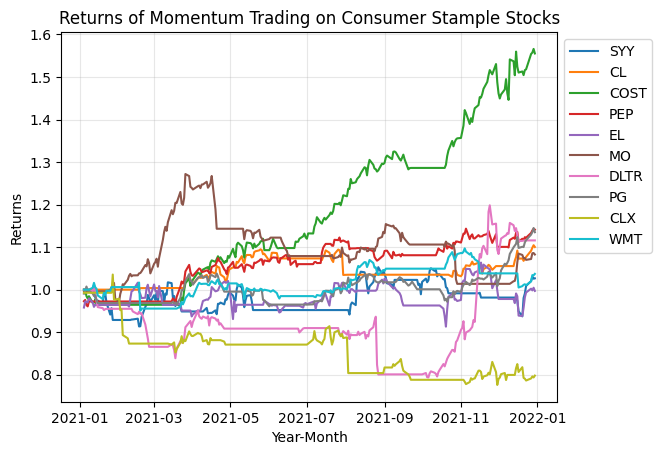

In [ ]:
#Graph for Consumer Staples Momentum Trading
for stock_name in stock_names_con:

  plt.plot(np.exp(moving_averages_con[f"{stock_name}-system_return"]).cumprod(),label=stock_name)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.title("Returns of Momentum Trading on Consumer Stample Stocks")
  plt.xlabel("Year-Month")
  plt.ylabel("Returns")
  plt.grid(True, alpha=0.3)

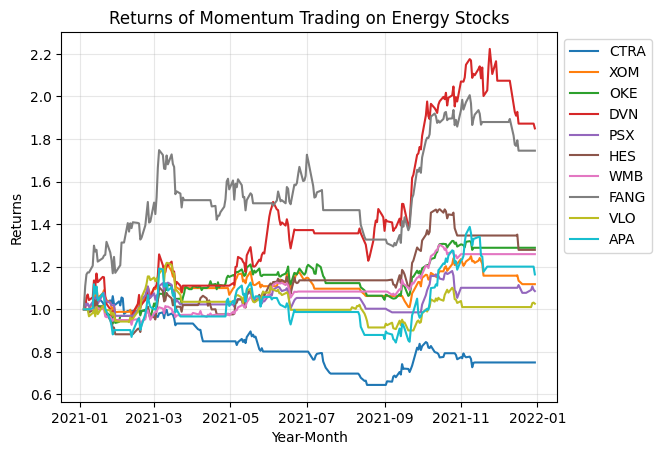

In [ ]:
#Graph for Consumer Energy Trading
for stock_name in stock_names_energy:
  plt.plot(np.exp(moving_averages_energy[f"{stock_name}-system_return"]).cumprod(),label=stock_name)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.title("Returns of Momentum Trading on Energy Stocks")
  plt.xlabel("Year-Month")
  plt.ylabel("Returns")
  plt.grid(True, alpha=0.3)

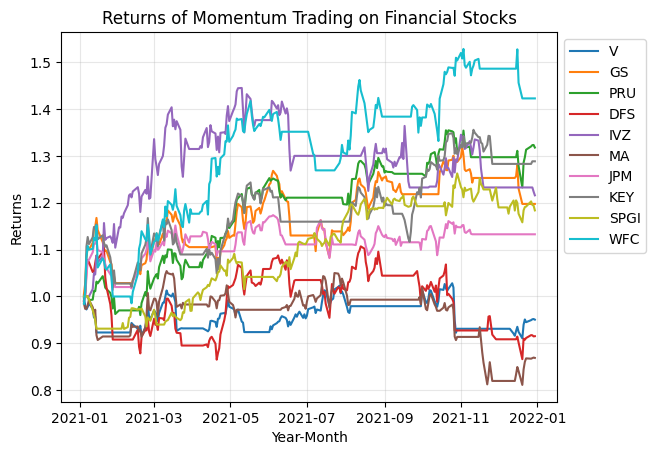

In [ ]:
#Graph for Financial Momentum Trading
for stock_name in stock_names_fin:
  plt.plot(np.exp(moving_averages_fin[f"{stock_name}-system_return"]).cumprod(),label=stock_name)
  plt.legend(bbox_to_anchor=(1.0, 1.0))
  plt.title("Returns of Momentum Trading on Financial Stocks")
  plt.xlabel("Year-Month")
  plt.ylabel("Returns")
  plt.grid(True, alpha=0.3)

As you can see in the plots above, as expected, the 3 selected stocks based on the 8-21 Momentum Trading Strategy all have the highest returns shown in 2021. Note here there are some horizontal (or flat) lines here indicating times where returns stayed same as these are times we are not invested in the stock.

## 2.9 - Discussion
In the Consumer Staples sector COSTCO ('COST'), Pespi ('PEP'), and Procter & Gamble ('PG') has the highest returns using the Momentum Trading Strategy.

In the Energy sector Devon Energy ('DVN'), Hess ('HES'), and Diamondback Energy ('FANG') has the highest returns using the Momentum Trading Strategy.

In the Energy sector Wells Fargo ('WFC'), Prudential Financial ('PRU'), and S&P Global ('SPGI') has the highest returns using the Momentum Trading Strategy.

In the Consumer staple sector, Costco really performed much better than the others where alot hovered around break even point.

In the energy sector, there were very well performing stocks using momentum trading strategy. DVN and FANG had excellent returns (and similar trading movements) while a good amount of the sector performed between 1.3 and 1.1 return which is still making money!

In the financial sector, we had a much larger variation in returns than the other sectors but still 7 out of the 10 stocks made money using the momentum trading strategy.

# 3 - Optimization Model


We have selected 9 stocks out of 30. Three best performing from each sector are picked for our next steps

Top 9 stocks from respective sectors:

**Consumer staples sector**
1.   Cost (Costco Wholesale Corporation)
2.   PEP (PepsiCo, Inc.)
3.   PG (Procter & Gamble Co)
**Energy sector**
1.   DVN (Devon Energy Corp)
2.   FANG (Diamondback Energy Inc)
3.   Hes (Hess Corp.)
**Financials sector**
1.   WFC(Wells Fargo & Co)
2.   SPGI(S&P Global Inc)
3.   Pru(Prudential Financial Inc)


In [ ]:
# Defining selected stocks for each sector.
selected_stocks_con = ['COST', 'PEP', 'PG']
selected_stocks_energy = ['DVN', 'HES', 'FANG']
selected_stocks_fin = ['WFC', 'PRU', 'SPGI']

# Extracting return data for the selected stocks in each sector.
selected_stocks_con_data = return_con_data[selected_stocks_con]
selected_stocks_energy_data = return_energy_data[selected_stocks_energy]
selected_stocks_fin_data = return_fin_data[selected_stocks_fin]

# Combining data for selected stocks from all sectors into 'Top_Stocks'.
Top_Stocks = pd.concat([selected_stocks_con_data, selected_stocks_energy_data, selected_stocks_fin_data], axis=1)

# Displaying the combined DataFrame 'Top_Stocks'.
print(Top_Stocks)


                COST       PEP        PG       DVN       HES      FANG  \
2017-01-04  0.000188  0.001911  0.003564  0.008921 -0.014168  0.003099   
2017-01-05  0.019717 -0.001335  0.006627  0.031789  0.002745  0.000965   
2017-01-06 -0.000491 -0.001433 -0.000352 -0.006937 -0.003221 -0.000096   
2017-01-09 -0.011423 -0.010520 -0.007409 -0.042942 -0.020840 -0.021513   
2017-01-10  0.004287 -0.014402 -0.010782  0.002576  0.013859  0.012620   
...              ...       ...       ...       ...       ...       ...   
2021-12-23  0.001274 -0.001118  0.004896 -0.005675 -0.008366  0.002365   
2021-12-27  0.023802  0.009954  0.011680  0.060880  0.028848  0.049084   
2021-12-28  0.002076  0.005190  0.005371 -0.002466 -0.004365 -0.008818   
2021-12-29  0.005543  0.003539  0.008290 -0.006742 -0.008103 -0.013163   
2021-12-30 -0.006798 -0.001734 -0.008648 -0.011991 -0.009508 -0.012878   

                 WFC       PRU      SPGI  
2017-01-04  0.000893  0.012207  0.030907  
2017-01-05 -0.015522 -0.0

Calculating and printing the Average Return and Standard Deviation of daily returns for
the 9 stocks we picked in the beginning of this section from all three sectors.

In [ ]:
# Calculating and displaying the average return for each stock in 'Top_Stocks'.
Avg_Return = pd.DataFrame(np.mean(Top_Stocks) ,columns=["Avg_Return"])
print(Avg_Return)
# Calculating and displaying the standard deviation of returns for each stock in 'Top_Stocks'.
Std_Dev_Return = pd.DataFrame(np.std(Top_Stocks) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
COST    0.001186
PEP     0.000602
PG      0.000718
DVN     0.000723
HES     0.000691
FANG    0.000803
WFC     0.000243
PRU     0.000473
SPGI    0.001357
      Std_Dev_Return
COST        0.013570
PEP         0.013162
PG          0.012680
DVN         0.036061
HES         0.030956
FANG        0.037155
WFC         0.022109
PRU         0.023206
SPGI        0.017280


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


**Covariance Matrix** is a guide that shows how different stocks in a group behave together. If the number is positive, it means those stocks usually move in the same direction—either up or down. If it's negative, they tend to move in opposite directions.

In [ ]:
# Calculating and displaying the covariance matrix for the stocks in 'Top_Stocks'.
Covariance_matrix = Top_Stocks.cov()
Covariance_matrix

,COST,PEP,PG,DVN,HES,FANG,WFC,PRU,SPGI
COST,0.000184,0.000096,0.000083,0.000082,0.000077,0.000049,0.000087,0.000096,0.000105
PEP,0.000096,0.000173,0.000123,0.000110,0.000101,0.000080,0.000123,0.000141,0.000116
PG,0.000083,0.000123,0.000161,0.000081,0.000090,0.000053,0.000100,0.000118,0.000099
DVN,0.000082,0.000110,0.000081,0.001301,0.000895,0.001119,0.000432,0.000486,0.000226
HES,0.000077,0.000101,0.000090,0.000895,0.000959,0.000883,0.000379,0.000445,0.000196
FANG,0.000049,0.000080,0.000053,0.001119,0.000883,0.001382,0.000402,0.000473,0.000208
WFC,0.000087,0.000123,0.000100,0.000432,0.000379,0.000402,0.000489,0.000413,0.000181
PRU,0.000096,0.000141,0.000118,0.000486,0.000445,0.000473,0.000413,0.000539,0.000208
SPGI,0.000105,0.000116,0.000099,0.000226,0.000196,0.000208,0.000181,0.000208,0.000299


 Considering the covariance between COST and PG (0.000083) compared to COST and WFC (0.000087), for instance. The slightly higher covariance between COST and WFC suggests they might share a bit more common ground in terms of returns, possibly impacting risk differently than COST and PG, making for an interesting consideration in portfolio diversification.

**Correlation Matrix** is like a compatibility scale for stocks. If the number is positive, it means that the stocks have good synergy, moving in similar directions. If it's negative, they're a bit like contrasts. A number close to 1 means they have strong compatibility, and close to -1 means there's a bit of complexity. It's like having a mix of closely aligned and more independent stocks.

In [ ]:
# Calculating and displaying the correlation matrix for the stocks in 'Top_Stocks'.
Corr_matrix = Top_Stocks.corr()
Corr_matrix

,COST,PEP,PG,DVN,HES,FANG,WFC,PRU,SPGI
COST,1.000000,0.534858,0.481019,0.168237,0.184205,0.096903,0.289120,0.304957,0.447568
PEP,0.534858,1.000000,0.735452,0.231088,0.248441,0.163246,0.421384,0.461259,0.509128
PG,0.481019,0.735452,1.000000,0.177020,0.229820,0.111384,0.355585,0.399041,0.452492
DVN,0.168237,0.231088,0.177020,1.000000,0.801109,0.834363,0.541752,0.580743,0.362237
HES,0.184205,0.248441,0.229820,0.801109,1.000000,0.766843,0.552890,0.619014,0.365604
FANG,0.096903,0.163246,0.111384,0.834363,0.766843,1.000000,0.488899,0.548378,0.324224
WFC,0.289120,0.421384,0.355585,0.541752,0.552890,0.488899,1.000000,0.805143,0.472257
PRU,0.304957,0.461259,0.399041,0.580743,0.619014,0.548378,0.805143,1.000000,0.517779
SPGI,0.447568,0.509128,0.452492,0.362237,0.365604,0.324224,0.472257,0.517779,1.000000


The correlation between COST and PG (0.481019) is less intense than that between COST and WFC (0.289121). This suggests that COST and PG move somewhat in sync, but COST and WFC have a weaker association, indicating potential diversification benefits by including both in a portfolio for a balanced risk approach.

### 3.1 - Nonlinear optimization model


In [ ]:
# Calculating and displaying the covariance matrix for the stocks in 'Top_Stocks'.
df_cov = Top_Stocks.cov()
# print('Covariance Matrix:')
# print(df_cov)
# Adding a blank line for better readability.
print('\n')

# Calculating and displaying the average return for each stock in 'Top_Stocks'.
df_return = Top_Stocks.mean()
print('Average Return:')
print(df_return)



Average Return:
COST    0.001186
PEP     0.000602
PG      0.000718
DVN     0.000723
HES     0.000691
FANG    0.000803
WFC     0.000243
PRU     0.000473
SPGI    0.001357
dtype: float64


In [ ]:
# Importing necessary classes and functions from 'pyomo'.
from pyomo.environ import *

# Defining the list of top stocks.
top_stocks = ['COST', 'PEP', 'PG', 'DVN', 'FANG', 'HES', 'WFC', 'SPGI', 'PRU']

# Creating a concrete model in Pyomo.
m = ConcreteModel()

# Adding decision variables for each stock with constraints using loop.
for stock in top_stocks:
    m.add_component(stock, Var(within=NonNegativeReals, bounds=(0, 1)))


In [ ]:
# Declaring the objective function to maximize returns.
m.objective = Objective(expr = sum(getattr(m, stock) * return_val for stock, return_val in zip(top_stocks, df_return)),
                        sense=maximize)

# Declaring constraints:
# 1. Sum of all proportions should equal 1.
m.sum_proportions = Constraint(expr = sum(getattr(m, stock) for stock in top_stocks) == 1)

# 2. Set maximum risk
m.total_risk = Constraint(expr = sum(getattr(m, stock) for stock in top_stocks) >= 0.0)


<ipython-input-41-ab939aa9b15d>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.objective = Objective(expr = sum(getattr(m, stock) * return_val for stock, return_val in zip(top_stocks, df_return)),
<ipython-input-41-ab939aa9b15d>:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.sum_proportions = Constraint(expr = sum(getattr(m, stock) for stock in top_stocks) == 1)
<ipython-input-41-ab939aa9b15d>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  m.total_risk = Constraint(expr = sum(getattr(m, stock) for stock in top_stocks) >= 0.0)


In [ ]:
#  Calculate risk
def calc_risk(m):
    variables = [getattr(m, stock) for stock in top_stocks]
    risk_exp = 0
    for i in range(len(variables)):
        for j in range(len(variables)):
            risk_exp += variables[i] * df_cov.at[top_stocks[i], top_stocks[j]] * variables[j]
    return risk_exp

# We are going to use this expression to compute the risk
m.risk_expression = Expression(rule=calc_risk)

# 3. Set maximum risk
max_risk = 0.0006
# Sequence of risk levels
risk_limits = np.arange(0.0001, max_risk, 0.000004)
risk_limits
# # Remove the existing total_risk constraint if it already exists
# try:
#     del m.total_risk
# except AttributeError:
#     pass

# m.total_risk = Constraint(expr=m.risk_expression <= max_risk)



array([0.0001  , 0.000104, 0.000108, 0.000112, 0.000116, 0.00012 ,
       0.000124, 0.000128, 0.000132, 0.000136, 0.00014 , 0.000144,
       0.000148, 0.000152, 0.000156, 0.00016 , 0.000164, 0.000168,
       0.000172, 0.000176, 0.00018 , 0.000184, 0.000188, 0.000192,
       0.000196, 0.0002  , 0.000204, 0.000208, 0.000212, 0.000216,
       0.00022 , 0.000224, 0.000228, 0.000232, 0.000236, 0.00024 ,
       0.000244, 0.000248, 0.000252, 0.000256, 0.00026 , 0.000264,
       0.000268, 0.000272, 0.000276, 0.00028 , 0.000284, 0.000288,
       0.000292, 0.000296, 0.0003  , 0.000304, 0.000308, 0.000312,
       0.000316, 0.00032 , 0.000324, 0.000328, 0.000332, 0.000336,
       0.00034 , 0.000344, 0.000348, 0.000352, 0.000356, 0.00036 ,
       0.000364, 0.000368, 0.000372, 0.000376, 0.00038 , 0.000384,
       0.000388, 0.000392, 0.000396, 0.0004  , 0.000404, 0.000408,
       0.000412, 0.000416, 0.00042 , 0.000424, 0.000428, 0.000432,
       0.000436, 0.00044 , 0.000444, 0.000448, 0.000452, 0.000

In [ ]:
print(len(risk_limits))

125


## 3.2 - Removal of Infeasible Solutions:

In [ ]:
# Importing necessary classes and functions from 'pyomo'.

from pyomo.opt import SolverFactory, TerminationCondition

# Assume 'm' is already defined and has the necessary components (vars, constraints, etc.)
# Also, 'risk_limits' is defined before this code chunk.


# Updating risk constraint for each limit and then solving the problem
param_analysis = {}  # key=risk, value=stock allocations
returns = {}  # key=risk, value=return

for r in risk_limits:
    # Remove constraint to avoid error messages
    m.del_component(m.total_risk)
    m.total_risk = Constraint(expr=m.risk_expression <= r)

    # Run solver
    result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

    # If solution is not feasible, ignore this run
    if result.solver.termination_condition == TerminationCondition.infeasible:
        continue

    # Store our allocation proportions
    param_analysis[r] = [getattr(m, stock)() for stock in top_stocks]

    # Store our returns
    returns[r] = sum(getattr(m, stock)() * return_val for stock, return_val in zip(top_stocks, df_return))


  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
<ipython-input-44-e6c9eb57de6a>:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  returns[r] = sum(getattr(m, stock)() * return_val for stock, return_val in zip(top_stocks, df_return))
  - termination condition: maxIterations
  - message from solver: Ipopt 3.12.13\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be

In [ ]:
# Printing the dictionary to check the feasibility of solutions.
print(param_analysis)

{0.00010800000000000001: [0.3436585518427057, 0.16301434431176168, 0.38980128254970325, 0.0, 0.03879048752523197, 0.0, 0.011911480770859946, 0.05282388020510641, 0.0], 0.00011200000000000001: [0.3436585522670883, 0.16301434441715837, 0.38980128293109967, 0.0, 0.038790487572863463, 0.0, 0.011911480752676269, 0.05282388022194826, 0.0], 0.00012000000000000002: [0.3868167456205136, 0.1395190375926814, 0.39330675606020565, 1.4713245545438586e-06, 0.04319072037146661, 4.4753602373881825e-06, 5.903839508816364e-05, 0.03709768865802994, 4.0666172228205625e-06], 0.00012400000000000003: [0.48061914848190884, 0.05671147630625501, 0.3886938642274981, 4.421983367788485e-06, 0.03456966962391838, 1.2773974439685512e-05, 4.7425197568312985e-06, 4.78216257924248e-05, 0.03933608125706302], 0.00012800000000000002: [0.5278792758714284, 0.0011031009324020298, 0.3759242012822818, 5.621565532427038e-06, 0.024219198281901125, 1.232279463276498e-05, 3.830533699037221e-06, 1.1510330541958415e-05, 0.070840938407

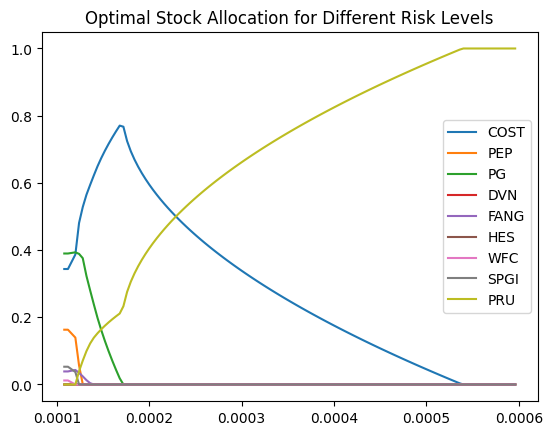

In [ ]:
# Converting the dictionary 'param_analysis' to a DataFrame and setting column names.
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['COST', 'PEP', 'PG', 'DVN', 'FANG', 'HES', 'WFC', 'SPGI', 'PRU']
# Plotting the optimal stock allocation for different risk levels.
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

Each line in the chart shows how the optimal allocation to a particular stock changes as the level of risk changes. For instance, one stock begins with a higher allocation at lower risk levels and decreases as risk increases, whereas another stock's allocation increases with the risk level. The lines intersect at various points, suggesting that the optimal allocation changes depending on the risk level. Example: DVN shows an optimal allocation at lower risks which rapidly decreases as risk increases whereas PRU has a rising allocation with increased risk.

In [ ]:
# Extracting risk values from dictionary keys
risk = list(returns.keys())  # Converting dict_keys to a list
print("Risk Levels:", risk)

# Extracting reward values from dictionary values
reward = list(returns.values())  # Converting dict_values to a list
print("Reward Levels:", reward)



Risk Levels: [0.00010800000000000001, 0.00011200000000000001, 0.00012000000000000002, 0.00012400000000000003, 0.00012800000000000002, 0.000132, 0.00013600000000000003, 0.00014000000000000004, 0.00014400000000000003, 0.00014800000000000002, 0.00015200000000000004, 0.00015600000000000005, 0.00016000000000000004, 0.00016400000000000003, 0.00016800000000000004, 0.00017200000000000006, 0.00017600000000000005, 0.00018000000000000004, 0.00018400000000000005, 0.00018800000000000007, 0.00019200000000000006, 0.00019600000000000005, 0.00020000000000000006, 0.00020400000000000008, 0.00020800000000000007, 0.00021200000000000006, 0.00021600000000000007, 0.0002200000000000001, 0.00022400000000000008, 0.00022800000000000007, 0.00023200000000000006, 0.0002360000000000001, 0.0002400000000000001, 0.00024400000000000008, 0.00024800000000000007, 0.0002520000000000001, 0.0002560000000000001, 0.0002600000000000001, 0.0002640000000000001, 0.0002680000000000001, 0.0002720000000000001, 0.0002760000000000001, 0.

In [ ]:
# Print the keys of the DataFrame
print("Keys of the DataFrame:")
print(param_analysis.keys())

# Print the head of the DataFrame (first 30 rows)
print("\nHead of the DataFrame (First 30 rows):")
print(param_analysis.head(30))


Keys of the DataFrame:
Index(['COST', 'PEP', 'PG', 'DVN', 'FANG', 'HES', 'WFC', 'SPGI', 'PRU'], dtype='object')

Head of the DataFrame (First 30 rows):
              COST       PEP        PG       DVN      FANG       HES  \
0.000108  0.343659  0.163014  0.389801  0.000000  0.038790  0.000000   
0.000112  0.343659  0.163014  0.389801  0.000000  0.038790  0.000000   
0.000120  0.386817  0.139519  0.393307  0.000001  0.043191  0.000004   
0.000124  0.480619  0.056711  0.388694  0.000004  0.034570  0.000013   
0.000128  0.527879  0.001103  0.375924  0.000006  0.024219  0.000012   
0.000132  0.564627  0.000039  0.323162  0.000007  0.012905  0.000016   
0.000136  0.594022  0.000022  0.280108  0.000007  0.003830  0.000014   
0.000140  0.622296  0.000018  0.238361  0.000007  0.000072  0.000013   
0.000144  0.649402  0.000016  0.198108  0.000006  0.000019  0.000011   
0.000148  0.673641  0.000015  0.162107  0.000006  0.000019  0.000010   
0.000152  0.695740  0.000014  0.129287  0.000006  0.0000

## 3.3 - Efficent frontier

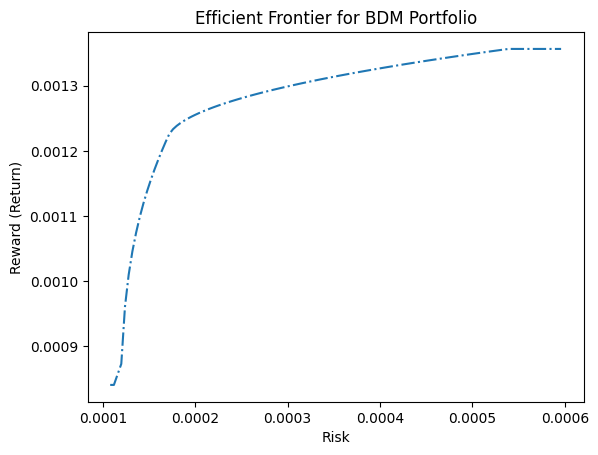

In [ ]:
# Import necessary modules from the pylab library
from pylab import *

# Create a line plot of risk vs. reward using the efficient frontier data
plot(risk, reward, '-.')

# Set the title of the plot
title('Efficient Frontier for BDM Portfolio')

# Label the x-axis as 'Risk' and the y-axis as 'Reward (Return)'
xlabel('Risk')
ylabel('Reward (Return)')

# Display the plot
plt.show()


*   At a low level of risk, approximately 0.00025, the portfolio's expected return is slightly above 0.0012. This indicates that for this portfolio, even a marginal increase in risk from the minimum risk level can result in a substantial increase in expected return.
*   As we move rightward along the x-axis to a risk level of about 0.00030, the graph shows the expected return increasing to nearly 0.0014. This further supports the principle that within certain ranges, taking on additional risk is associated with higher potential returns
*   The plateau effect on the curve beyond the risk level of 0.00050 exemplifies the concept of diminishing marginal returns to risk. It suggests that there is a threshold beyond which the portfolio's risk-return trade-off becomes less attractive.

In [ ]:
# Retrieve information about the index of the param_analysis DataFrame
index_info = param_analysis.index

# Print the index information
print("Index Information:", index_info)


Index Information: Float64Index([0.00010800000000000001, 0.00011200000000000001,
              0.00012000000000000002, 0.00012400000000000003,
              0.00012800000000000002,               0.000132,
              0.00013600000000000003, 0.00014000000000000004,
              0.00014400000000000003, 0.00014800000000000002,
              ...
               0.0005600000000000003,  0.0005640000000000003,
               0.0005680000000000003,  0.0005720000000000004,
               0.0005760000000000003,  0.0005800000000000003,
               0.0005840000000000003,  0.0005880000000000003,
               0.0005920000000000003,  0.0005960000000000004],
             dtype='float64', length=122)


In [ ]:
print(param_analysis.loc[0.00014000000000000004])

COST    0.622296
PEP     0.000018
PG      0.238361
DVN     0.000007
FANG    0.000072
HES     0.000013
WFC     0.000003
SPGI    0.000007
PRU     0.139224
Name: 0.00014000000000000004, dtype: float64


In [ ]:
# Selecting 3 portfolios from the above risk level allocations
selection_pf=param_analysis.loc[0.00014000000000000004, ['COST', 'PG', 'PRU']]
selection_pf = pd.DataFrame({'Allocation': selection_pf})
selection_pf


,Allocation
COST,0.622296
PG,0.238361
PRU,0.139224


# 4-Analysis

##4.1 - Buy-and-Hold strategy for the MPT Portfolio

In [ ]:
import yfinance as yf

# Define the ticker symbols from the optimized model
ticker_list = ['COST', 'PRU', 'PG']

# Define the date range
start_date = '2022-01-01'
end_date = '2022-12-02'

# Extract historical data for each ticker
historical_data = {}  # Dictionary to store historical data for each ticker

for ticker in ticker_list:
    # Use yfinance to get historical data
    df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

    # Store the data in the dictionary
    historical_data[ticker] = df

# Display the historical data for each ticker
for ticker, df in historical_data.items():
    print(f"\nHistorical Data for Ticker {ticker}:")
    print(df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Historical Data for Ticker COST:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-01  565.030029  568.719971  469.010010  505.130005  498.001678   
2022-02-01  505.000000  534.239990  482.980011  519.250000  511.922455   
2022-03-01  519.460022  586.320007  511.779999  575.849976  568.584229   
2022-04-01  577.380005  612.270020  529.700012  531.719971  525.010986   
2022-05-01  532.229980  546.140015  406.510010  466.220001  461.086334   
2022-06-01  469.380005  491.130005  443.200012  479.279999  474.002563   
2022-07-01  481.179993  542.119995  478.000000  541.299988  535.339600   
2022-08-01  541.419983  564.750000  520.260010  522.099976  517.242310   
2022-09-01  519.719

In [ ]:
#Appending
# Create an empty DataFrame
dfm = pd.DataFrame()

# Iterate over ticker symbols
for ticker in ticker_list:
    # Extract the 'Close' column from historical data and append to dfm
    dfm[f"{ticker}_close"] = historical_data[ticker]['Close']

# Display the first few rows of the DataFrame
dfm.head()

,COST_close,PRU_close,PG_close
Date,,,
2022-01-01,505.130005,111.570000,160.449997
2022-02-01,519.250000,111.660004,155.889999
2022-03-01,575.849976,118.169998,152.800003
2022-04-01,531.719971,108.510002,160.550003
2022-05-01,466.220001,106.250000,147.880005


In [ ]:
# Applying log to close for each ticker
for ticker in ticker_list:
    dfm[f"{ticker}_logClose"] = np.log(dfm[f"{ticker}_close"])

# Display the first few rows of the DataFrame
dfm.head()

,COST_close,PRU_close,PG_close,COST_logClose,PRU_logClose,PG_logClose
Date,,,,,,
2022-01-01,505.130005,111.570000,160.449997,6.224816,4.714652,5.077982
2022-02-01,519.250000,111.660004,155.889999,6.252385,4.715459,5.049151
2022-03-01,575.849976,118.169998,152.800003,6.355847,4.772124,5.029130
2022-04-01,531.719971,108.510002,160.550003,6.276117,4.686842,5.078605
2022-05-01,466.220001,106.250000,147.880005,6.144658,4.665795,4.996401


In [ ]:
# Calculating returns for each stock
for ticker in ticker_list:
    dfm[f"{ticker}_return"] = dfm[f"{ticker}_logClose"].diff()

# Display the first few rows of the DataFrame
dfm.head()

,COST_close,PRU_close,PG_close,COST_logClose,PRU_logClose,PG_logClose,COST_return,PRU_return,PG_return
Date,,,,,,,,,
2022-01-01,505.130005,111.570000,160.449997,6.224816,4.714652,5.077982,NaN,NaN,NaN
2022-02-01,519.250000,111.660004,155.889999,6.252385,4.715459,5.049151,0.027570,0.000806,-0.028832
2022-03-01,575.849976,118.169998,152.800003,6.355847,4.772124,5.029130,0.103462,0.056666,-0.020021
2022-04-01,531.719971,108.510002,160.550003,6.276117,4.686842,5.078605,-0.079730,-0.085282,0.049476
2022-05-01,466.220001,106.250000,147.880005,6.144658,4.665795,4.996401,-0.131459,-0.021048,-0.082204


In [ ]:
# Making NaN values 0.0 for return columns
for ticker in ticker_list:
    dfm[f"{ticker}_return"].fillna(0.0, inplace=True)

# Display the first few rows of the DataFrame
print(dfm.head())

            COST_close   PRU_close    PG_close  COST_logClose  PRU_logClose  \
Date                                                                          
2022-01-01  505.130005  111.570000  160.449997       6.224816      4.714652   
2022-02-01  519.250000  111.660004  155.889999       6.252385      4.715459   
2022-03-01  575.849976  118.169998  152.800003       6.355847      4.772124   
2022-04-01  531.719971  108.510002  160.550003       6.276117      4.686842   
2022-05-01  466.220001  106.250000  147.880005       6.144658      4.665795   

            PG_logClose  COST_return  PRU_return  PG_return  
Date                                                         
2022-01-01     5.077982     0.000000    0.000000   0.000000  
2022-02-01     5.049151     0.027570    0.000806  -0.028832  
2022-03-01     5.029130     0.103462    0.056666  -0.020021  
2022-04-01     5.078605    -0.079730   -0.085282   0.049476  
2022-05-01     4.996401    -0.131459   -0.021048  -0.082204  


In [ ]:
# Selecting 'return' columns for a subset DataFrame
df_log = dfm[['COST_return', 'PG_return', 'PRU_return']]

# Display the first few rows of the subset DataFrame
print(df_log.head())

            COST_return  PG_return  PRU_return
Date                                          
2022-01-01     0.000000   0.000000    0.000000
2022-02-01     0.027570  -0.028832    0.000806
2022-03-01     0.103462  -0.020021    0.056666
2022-04-01    -0.079730   0.049476   -0.085282
2022-05-01    -0.131459  -0.082204   -0.021048


Calculating profit/loss for the invested amount of 100000 as recommended according to guidelines for the assessts based on the weights from their portfolio.

In [ ]:
# Initial investment amount.
starting_investment = 100000
# Portfolio allocation weights for three different stocks according to output achieved after efficient frontier part.
weights = [0.139224,0.238361, 0.622296]
# Assign initial investment values to the portfolio on a specific date, adjusted by weights.
df_log.loc["2022-01-01"] =  [(i*starting_investment)-1 for i in weights]
print(df_log)

             COST_return     PG_return    PRU_return
Date                                                
2022-01-01  13921.400000  23835.100000  62228.600000
2022-02-01      0.027570     -0.028832      0.000806
2022-03-01      0.103462     -0.020021      0.056666
2022-04-01     -0.079730      0.049476     -0.085282
2022-05-01     -0.131459     -0.082204     -0.021048
2022-06-01      0.027627     -0.028047     -0.104786
2022-07-01      0.121689     -0.034528      0.044061
2022-08-01     -0.036115     -0.007007     -0.043330
2022-09-01     -0.100308     -0.088555     -0.109955
2022-10-01      0.060053      0.064563      0.203982
2022-11-01      0.072576      0.102192      0.026641
2022-12-01     -0.166591      0.015962     -0.082653


<ipython-input-59-23d82b1a13c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log.loc["2022-01-01"] =  [(i*starting_investment)-1 for i in weights]


Calculating cumulative return till the date

In [ ]:
# Calculate the compounded monthly values by sequentially multiplying the (1 + log returns).
Monthly_BH_Values = (1 + df_log).cumprod()
Monthly_BH_Values

,COST_return,PG_return,PRU_return
Date,,,
2022-01-01,13922.400000,23836.100000,62229.600000
2022-02-01,14306.235433,23148.864188,62279.780631
2022-03-01,15786.382943,22685.407035,65808.906593
2022-04-01,14527.731666,23807.779863,60196.598276
2022-05-01,12617.925482,21850.678640,58929.607574
2022-06-01,12966.525286,21237.825841,52754.638330
2022-07-01,14544.404321,20504.534953,55079.053393
2022-08-01,14019.139884,20360.850612,52692.503810
2022-09-01,12612.904342,18557.800423,46898.712031


In [ ]:
# Add a new column 'Aggregate' to store the sum of values across all stocks for each row (month).
Monthly_BH_Values['Aggregate'] = Monthly_BH_Values.sum(axis=1)
Monthly_BH_Values

,COST_return,PG_return,PRU_return,Aggregate
Date,,,,
2022-01-01,13922.400000,23836.100000,62229.600000,99988.100000
2022-02-01,14306.235433,23148.864188,62279.780631,99734.880252
2022-03-01,15786.382943,22685.407035,65808.906593,104280.696572
2022-04-01,14527.731666,23807.779863,60196.598276,98532.109805
2022-05-01,12617.925482,21850.678640,58929.607574,93398.211696
2022-06-01,12966.525286,21237.825841,52754.638330,86958.989456
2022-07-01,14544.404321,20504.534953,55079.053393,90127.992667
2022-08-01,14019.139884,20360.850612,52692.503810,87072.494307
2022-09-01,12612.904342,18557.800423,46898.712031,78069.416796


## 4.2.0 - Momentum trading strategy for S&P500

In [ ]:
# Importing necessary library
import yfinance as yf

# Define the ticker symbol for S&P 500
ticker = '^GSPC'

# Download S&P 500 index data using yfinance
# 'start' is set to '2021-12-02' and 'end' is set to '2022-12-02'
# 'interval' is set to '1d' for daily data
sp500 = yf.download(ticker, start='2021-12-02', end='2022-12-02', interval='1d')

sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-02,4504.729980,4595.459961,4504.729980,4577.100098,4577.100098,5077180000
2021-12-03,4589.490234,4608.029785,4495.120117,4538.430176,4538.430176,5240070000
2021-12-06,4548.370117,4612.600098,4540.509766,4591.669922,4591.669922,4770800000
2021-12-07,4631.970215,4694.040039,4631.970215,4686.750000,4686.750000,4492400000
2021-12-08,4690.859863,4705.060059,4674.520020,4701.209961,4701.209961,4234600000
...,...,...,...,...,...,...
2022-11-25,4023.340088,4034.020020,4020.760010,4026.120117,4026.120117,1706460000
2022-11-28,4005.360107,4012.270020,3955.770020,3963.939941,3963.939941,3615430000
2022-11-29,3964.189941,3976.770020,3937.649902,3957.629883,3957.629883,3546040000


In [ ]:
# Calculate 8-day moving average and assign it to a new column '8-day'
sp500['8-day'] = sp500['Close'].rolling(8).mean().shift()

# Calculate 21-day moving average and assign it to a new column '21-day'
sp500['21-day'] = sp500['Close'].rolling(21).mean().shift()

# Drop rows with missing values (NaN) introduced by the rolling averages
sp500.dropna(inplace=True)


In [ ]:
# Calculate the logarithm of the closing prices and create a new column 'logClose'
sp500['logClose'] = np.log(sp500['Close'])

# Calculate the log returns and create a new column 'return'
sp500['return'] = sp500['logClose'].diff()

In [ ]:
# Create a new column 'invested' using np.where()
# If the 8-day moving average is greater than the 21-day moving average, set 'invested' to 1, otherwise set it to 0
sp500['invested'] = np.where(sp500['8-day'] > sp500['21-day'], 1, 0)

# Create a new column 'signal' representing buy (1) and sell (-1) signals
sp500['signal'] = sp500['invested'].diff()

# Print the count of buy (1) and sell (-1) signals
print(sp500['signal'].value_counts())

 0.0    220
-1.0      5
 1.0      5
Name: signal, dtype: int64


In [ ]:
# Buying on the first day
# Setting row with NaN to 1 for signal
sp500['signal'].iloc[0] = 1.0
#sp500['signal'].fillna(0, inplace=True)  # Fill any remaining NaN values with 0 (no signal)


<ipython-input-66-50337fcde948>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['signal'].iloc[0] = 1.0


In [ ]:
# Calculate log returns and create a new column 'return'
sp500['return'] = np.log(sp500['Close']).diff()

# Set the first return value to 0.0
sp500['return'].iloc[0] = 0.0


<ipython-input-67-4c33e94d6d8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['return'].iloc[0] = 0.0


In [ ]:
# Calculate system returns by multiplying 'invested' with 'return'
sp500['system_return'] = sp500['invested'] * sp500['return']

# Display the first few rows of the DataFrame
sp500.head()


,Open,High,Low,Close,Adj Close,Volume,8-day,21-day,logClose,return,invested,signal,system_return
Date,,,,,,,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,4748.386292,4682.474330,8.475654,0.000000,1,1.0,0.000000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,4766.802551,4692.924805,8.475024,-0.000630,1,0.0,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,4778.925049,4705.072893,8.455441,-0.019583,1,0.0,-0.019583
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,4775.773804,4710.259091,8.454477,-0.000964,1,0.0,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,4763.881287,4710.701939,8.450419,-0.004058,1,0.0,-0.004058


In [ ]:
# Set the initial investment
initial_investment = 100000

# Calculate cumulative returns
sp500['cumulative_return'] = (1 + sp500['system_return']).cumprod()

# Calculate the value of the $100,000 investment over time
sp500['investment_value'] = initial_investment * sp500['cumulative_return']

sp500['investment_value']


Date
2022-01-03    100000.000000
2022-01-04     99937.017975
2022-01-05     97979.924938
2022-01-06     97885.449388
2022-01-07     97488.187059
                  ...      
2022-11-25     89090.841497
2022-11-28     87704.169562
2022-11-29     87564.445094
2022-11-30     90233.290601
2022-12-01     90154.967218
Name: investment_value, Length: 231, dtype: float64

In [ ]:
sp500['cumulative_return']

Date
2022-01-03    1.000000
2022-01-04    0.999370
2022-01-05    0.979799
2022-01-06    0.978854
2022-01-07    0.974882
                ...   
2022-11-25    0.890908
2022-11-28    0.877042
2022-11-29    0.875644
2022-11-30    0.902333
2022-12-01    0.901550
Name: cumulative_return, Length: 231, dtype: float64

In [ ]:
# Extracting the investment value on the first day of each month
monthly_MT_values = sp500['investment_value'].resample('MS').first()

# Display the monthly investment values
print(monthly_MT_values)


Date
2022-01-01    100000.000000
2022-02-01     97098.407948
2022-03-01     91985.724470
2022-04-01     93684.596024
2022-05-01     91603.311289
2022-06-01     91603.311289
2022-07-01     81777.103571
2022-08-01     86255.628047
2022-09-01     84276.770236
2022-10-01     84276.770236
2022-11-01     85537.838023
2022-12-01     90154.967218
Freq: MS, Name: investment_value, dtype: float64


## 4.3 - Buy-and-Hold strategy for the S&P 500 index

In [ ]:
import yfinance as yf

# Download S&P 500 index data using yfinance
ticker = '^GSPC'
start_date = '2022-01-01'
end_date = '2022-12-02'

# Use the 'download' method
sp500 = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

# Select only the 'close' column and rename it
sp500 = sp500[['Close']]
sp500.columns = ['sp500_close']

# Display the first few rows of the DataFrame
sp500.head()


[*********************100%%**********************]  1 of 1 completed


,sp500_close
Date,
2022-01-01,4515.549805
2022-02-01,4373.939941
2022-03-01,4530.410156
2022-04-01,4131.930176
2022-05-01,4132.149902


In [ ]:
# Calculate the logarithm of the S&P 500 closing prices and create a new column 'sp500_logClose'
sp500['sp500_logClose'] = np.log(sp500['sp500_close'])

# Calculate the log returns and create a new column 'sp500_return'
sp500['sp500_return'] = sp500['sp500_logClose'].diff()

# Display the first few rows of the DataFrame
sp500.head()

<ipython-input-73-c398f6e12a08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['sp500_logClose'] = np.log(sp500['sp500_close'])
<ipython-input-73-c398f6e12a08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['sp500_return'] = sp500['sp500_logClose'].diff()


,sp500_close,sp500_logClose,sp500_return
Date,,,
2022-01-01,4515.549805,8.415282,NaN
2022-02-01,4373.939941,8.383419,-0.031863
2022-03-01,4530.410156,8.418568,0.035148
2022-04-01,4131.930176,8.326500,-0.092068
2022-05-01,4132.149902,8.326553,0.000053


In [ ]:
# Reset the first value of 'sp500_return' in the 'sp500' DataFrame to 0.0
sp500['sp500_return'].iloc[0]=0.0
# Create a new DataFrame 'sp500_returns' from the 'sp500_return' column of 'sp500'
sp500returns = pd.DataFrame(sp500["sp500_return"])

<ipython-input-74-52b7d0efee62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['sp500_return'].iloc[0]=0.0


In [ ]:
# Assuming 'sp500_returns' is a DataFrame with 'sp500_return' column
# Set the starting investment on January 1, 2022
starting_investment = 99999
sp500returns.loc["2022-01-01"] = [starting_investment]

# Calculate cumulative returns for the buy-and-hold strategy
Monthly_BH_Values_SP = (1 + sp500returns).cumprod()

# Display the resulting DataFrame
Monthly_BH_Values_SP

,sp500_return
Date,
2022-01-01,100000.000000
2022-02-01,96813.723898
2022-03-01,100216.560380
2022-04-01,90989.839646
2022-05-01,90994.678149
2022-06-01,83018.850673
2022-07-01,90258.209407
2022-08-01,86343.978872
2022-09-01,77878.023701


##4.4 - Plot Comparing the Investment Strategies

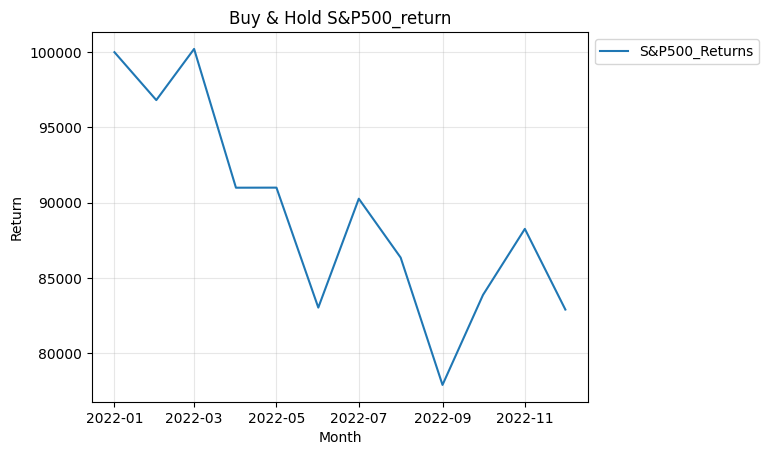

In [ ]:
import matplotlib.pyplot as plt
# Plot for sp500_return in Buy and Hold
plt.plot(Monthly_BH_Values_SP["sp500_return"], label='S&P500_Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Buy & Hold S&P500_return')
plt.xlabel('Month')
plt.ylabel('Return')
plt.grid(True, alpha=.3)
plt.show()

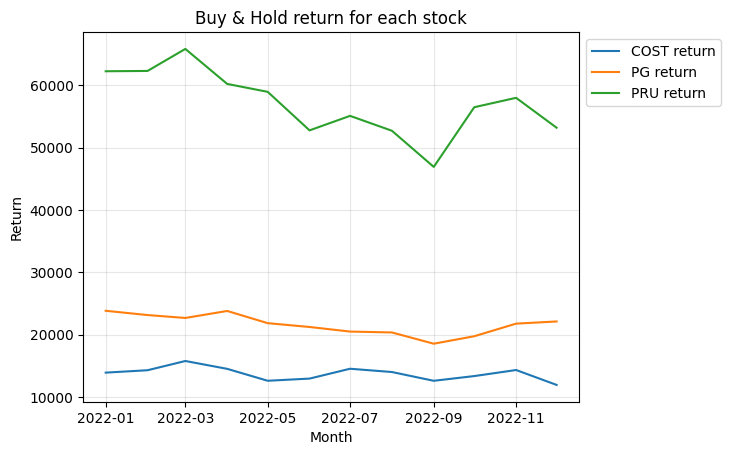

In [ ]:
# Plot for each stock return in Buy and Hold
plt.plot(Monthly_BH_Values['COST_return'], label='COST return')
plt.plot(Monthly_BH_Values['PG_return'], label='PG return')
plt.plot(Monthly_BH_Values['PRU_return'], label='PRU return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Buy & Hold return for each stock')
plt.xlabel('Month')
plt.ylabel('Return')
plt.grid(True, alpha=.3)
plt.show()


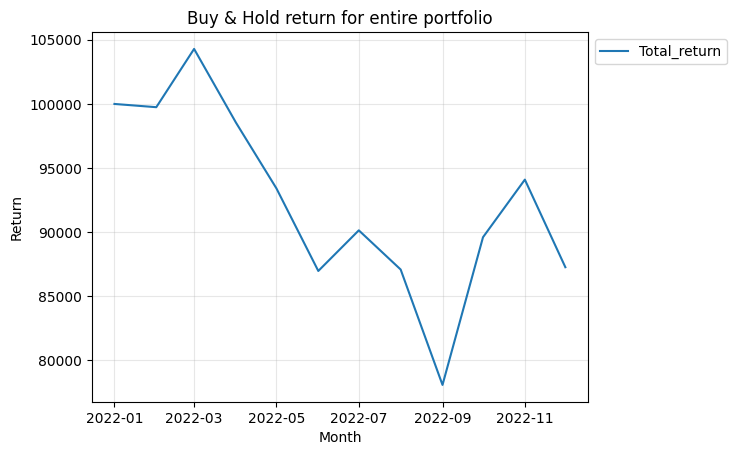

In [ ]:
# Plot for the aggregate return in Buy and Hold for the entire portfolio
plt.plot(Monthly_BH_Values['Aggregate'], label='Total_return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Buy & Hold return for entire portfolio')
plt.xlabel('Month')
plt.ylabel('Return')
plt.grid(True, alpha=.3)  # Display grid lines
plt.show()


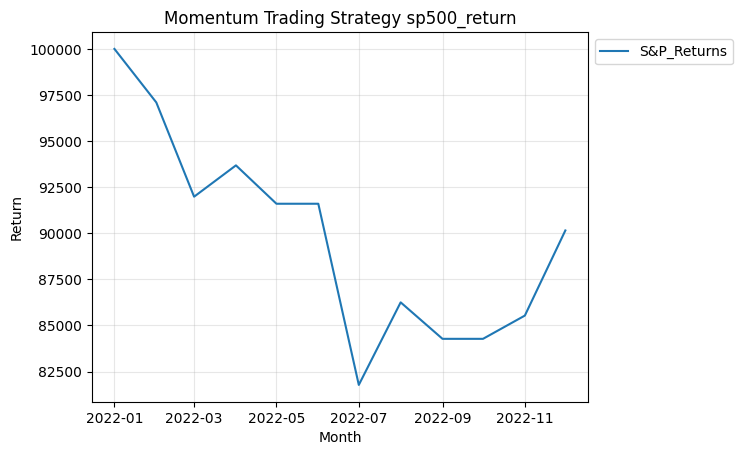

In [ ]:
import matplotlib.pyplot as plt

# Plot for sp500_return in Momentum Trading Strategy
plt.plot(monthly_MT_values, label='S&P_Returns')  # Assuming monthly_MT_values contains the sp500_return values
plt.title('Momentum Trading Strategy sp500_return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Month')
plt.ylabel('Return')
plt.grid(True, alpha=.3)  # Display grid lines
plt.show()


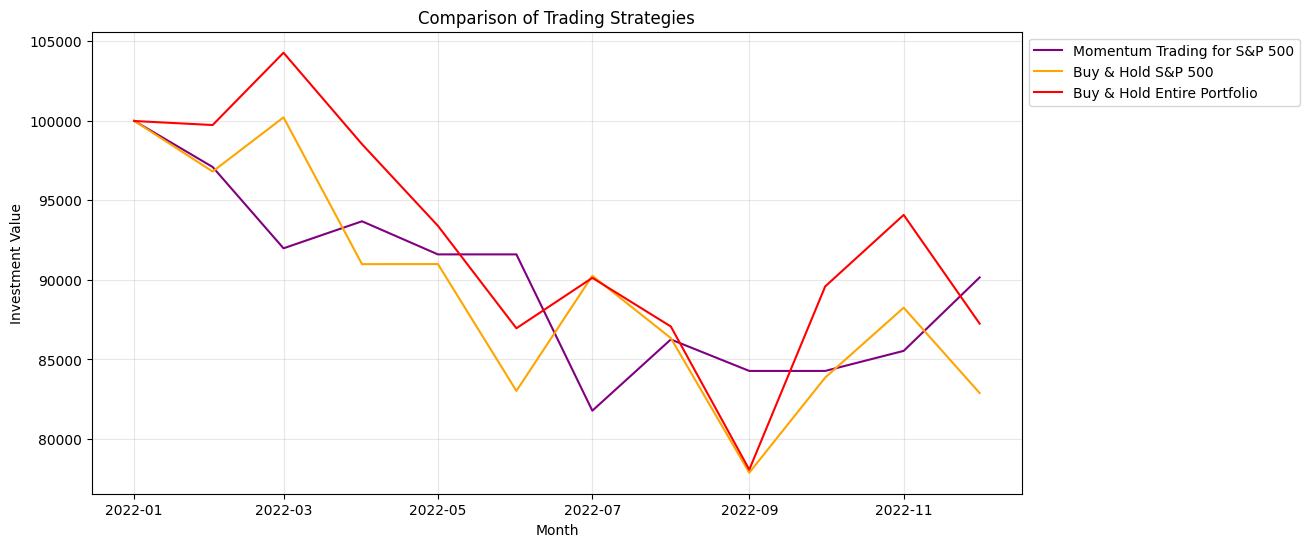

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot for Momentum Trading Strategy
plt.plot(monthly_MT_values, label='Momentum Trading for S&P 500', color='purple')  # Changed color to purple

# Plot for Buy & Hold S&P 500 (using the same data for this demonstration)
plt.plot(Monthly_BH_Values_SP['sp500_return'], label='Buy & Hold S&P 500', color='orange')  # Changed color to orange

# Plot for Buy & Hold Entire Portfolio (using the same data for this demonstration)
plt.plot(Monthly_BH_Values['Aggregate'], label='Buy & Hold Entire Portfolio', color='red')  # Changed color to brown

# Adding legends, title, and labels
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Comparison of Trading Strategies')
plt.xlabel('Month')
plt.ylabel('Investment Value')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()


Momentum trading ended the year with the strongest results, though it happened with more ups and downs. On the other hand, the more steady approaches of holding onto stocks, whether in the S&P 500 or across a mix of stocks, didn't do as well, likely due to the challenging market throughout 2022.

# 5 - Conclusion

•	The investment strategy implemented involved the 'buy and hold' approach, focusing on the three top-performing stocks. The total investment of a 100,000 USD was allocated among these stocks in a proportion determined by the Modern Portfolio Theory 'MPT'.

•	Among various strategies, the highest returns at the end was achieved with the S&P 500 index when applying momentum trading techniques.

•	Conversely, the strategy that resulted in the lowest closing value for the 100,000 USD investment was also linked to the S&P 500, but this time using a 'buy and hold' approach.

•	The investment strategy that divided 100,000 USD among the three highest-performing stocks out of a selection of thirty initially showed promising results, with the portfolio gaining value.

•	However, as the year 2022 progressed, this particular portfolio began to experience a decline, mirroring the general downward trend observed in the actual market.

•	This downturn reflects the volatile and unpredictable nature of the stock market in 2022, underscoring the challenges faced by investors in maintaining profitable positions amidst fluctuating market conditions.

•	We noticed in in the trading strategies, relating to dates between 2020 & 2021, there was a lot of volatility in the market across buy & hold and Momentum Trading. We attest this to the covid 19 pandemic which regardless of stock trading method had an effect.

## 5.1 - Group Contribution:
1. Data Prep & EDA - Krishna Bharati Raj Sakkhari & Pragnya Nakka
2. Momentum Trading for Stock Selection -  Timothy Carrier & Pragnya Nakka
3. Optimization Model - Ashrith Adepu, Sai Sankar Eluri & Krishna Bharati Raj Sakkhari
4. Analysis - Ashrith Adepu, Timothy Carrier & Sai Sankar Eluri
5. Conclusion - Entire Team
6. Video Recording - Timothy Carrier